<div class="alert alert-block alert-info">   

# BABS 502 Project  
#### Instructor: Martha Essak  

</div>

## Instructions and reminders for Jupyter notebooks

**Add markdown and code cells as needed to complete your project.** Please do not modify the headings of the sections.

Helpful notes abouts markdown in Jupyter to get you started:
* When you have a cell selected (by clicking on the white space to the left of the cell) in Command mode (blue box around the cell), press `a` or `b` to add a cell "above" or "below"
* In Command mode, press `d` twice to delete the cell. Press z to undo deleting a cell
* In Command mode, press `m` to change a code cell to a markdown cell, or press `y` to change a markdown cell to a code cell
* In Command mode, press `x` to cut cell, `c` to copy cell, and `v` to paste cell below the selected cell
  
* Double click a cell to enter Edit mode (green box around the cell), or press `Enter`
* Add two empty spaces at the end of a line to add a line break
* Press `shift + enter` to execute a cell to see either the formatted version (for a markdown cell) or to run the code (for a code cell). This will cause you to leave edit mode.
* Press `Ctrl + Shift + -` to split the current cell into two cells where the cursor is
* Press `Shift + m` to merge multiple cells. You can use `Shift + up arrow` or `Shift + down` arrow to select multiple cells.



[See cheat sheet for Markdown in Jupyter for more details](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd)

### Names of students: 
<br>
Abhijit Agrawal (86948742) 
<br>
Yashika Kochhar (43596394) 
</code> 

---

## Table of Contents
[Project description](#Description)  
[Part A: Time plot, trying transformations/adjustments, creating training and test set](#PartA)  
[Part B](#PartB)  
[Introduction & Approach](#Introduction)  
[Exploratory Data Analysis](#EDA1)  
[Potential causes of patterns](#Causes)   
[Exponential Smoothing Model](#ETS)  
[ARIMA model](#ARIMA)  
[Comparison of models](#Compare)  
[Forecasts](#Forecast)  
[Discussion](#Discussion)  
[Explanatory model](#Explanatory)


[Appendix A: ETS Models](#AppendixA)  
[Appendix B: ARIMA Models](#AppendixB)

---

<div class="alert alert-block alert-info">   
<a id="Description"></a>

# Project description

**Objective**  

The main goal of this project is to develop a model to forecast monthly energy use for the Vancouver International Airport (YVR).  

<br>

**Introduction**  

Budget planning at YVR requires forecasting the cost of energy to operate the airport. An accurate forecast could help the YVR representatives negotiate more favourable contracts with energy suppliers.

<br>

**Data Available**  

Data was taken from 14 years of records from the YVR database. This data set includes information on date, energy use, temperature, terminal area, and number of passengers. Data have been aggregated by month into 168 records (14 years with 12 months each).  

<br>


| # | Variable | Definition |  
| :- | :- | :- |  
| 1 | month | Month and year, e.g.: Nov-98 |
| 2 | energy | Energy use measured in thousands of kilowatt hours (kWh) |
| 3 | mean.temp | Mean monthly temperature outside (degrees Celsius) |
| 4 | total.area | Total area of all terminals (sq. m.) |
| 5 | total.passengers | Total number of passengers in thousands |
| 6 | domestic.passengers | Total number of domestic passengers (traveling within Canada) in thousands |
| 7 | US.passengers | Total number of passengers traveling between Canada and the US in thousands |
| 8 | international.passengers | Total number of passengers traveling between YVR and countries other than Canada/US |


In this project, you will develop appropriate models, compare the models, and discuss advantages and limitations of each model. You should select the best model and use it to provide monthly forecasts for energy use for the next three years (January 2011 through December 2013).   
    </div>

---

<div class="alert alert-block alert-info">   

# Part A (3.5 marks)
## Time plot, trying transformations/adjustments, creating training and test set
### See Canvas submission called "Project: Part A" for detailed questions and points breakdown.
<a id="PartA"></a>  

</div>


### Import the data

In [729]:
library(fpp2)
#import excel file into yvr variable
yvr <- read.csv("Energy use at YVR.csv", header=TRUE)
#check the form of the data and the information available
head(yvr)
#convert the data into a time series with energy information
energyts <- ts(yvr[,2], start = c(1997,1), frequency = 12) #frequency is 12 since the data is monthly
#print the timeseries
energyts

month  energy mean.temp total.area total.passengers domestic.passengers
1 Jan-97 5958    3.9      202966     1068.36          573.84             
2 Feb-97 5859    5.0      202966     1040.30          570.36             
3 Mar-97 5230    6.3      202966     1195.47          632.68             
4 Apr-97 5654    9.1      202966     1086.42          599.11             
5 May-97 5618   14.0      202966     1244.52          673.70             
6 Jun-97 5963   15.6      202966     1352.89          729.84             
  US.passengers international.passengers
1 263.13        231.38                  
2 267.39        202.56                  
3 319.09        243.71                  
4 265.37        221.94                  
5 307.55        263.27                  
6 333.89        289.16

Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec 
1997 5958 5859 5230 5654 5618 5963 5920 6430 6053 5514 5633 5545
1998 5825 5617 4970 5331 5233 5557 5841 6489 6138 5539 5667 5730
1999 6030 5954 5326 5672 5301 5777 5831 6345 6309 6068 6372 6302
2000 6570 6497 6106 6330 6070 6401 6697 7003 6760 6192 6334 6371
2001 6501 6435 5674 6206 6094 6544 6602 6886 6677 6133 6088 6291
2002 6349 6286 5588 5914 5716 6235 6483 6708 6553 5837 5961 5828
2003 6126 6020 5375 5741 5635 6199 6376 6844 6379 5822 5884 5820
2004 6105 6014 5552 5908 5956 6399 6572 7043 6418 5741 6497 6207
2005 6504 6337 5644 6148 6141 6521 6661 7387 6815 6173 6319 6434
2006 6544 6534 5809 6290 6202 6492 6733 7040 6690 6220 6497 6582
2007 6802 6947 6443 6835 6619 7096 7291 7642 7443 6921 7338 7358
2008 7540 7543 6923 7351 7084 7288 7788 8120 7628 7099 7385 7481
2009 7852 7773 6859 7410 6918 7759 7718 8630 8121 7423 7809 7841
2010 8171 8101 7306 7877 7575 7740 8149 8813 8154 7635 7932 7975


### Time plot

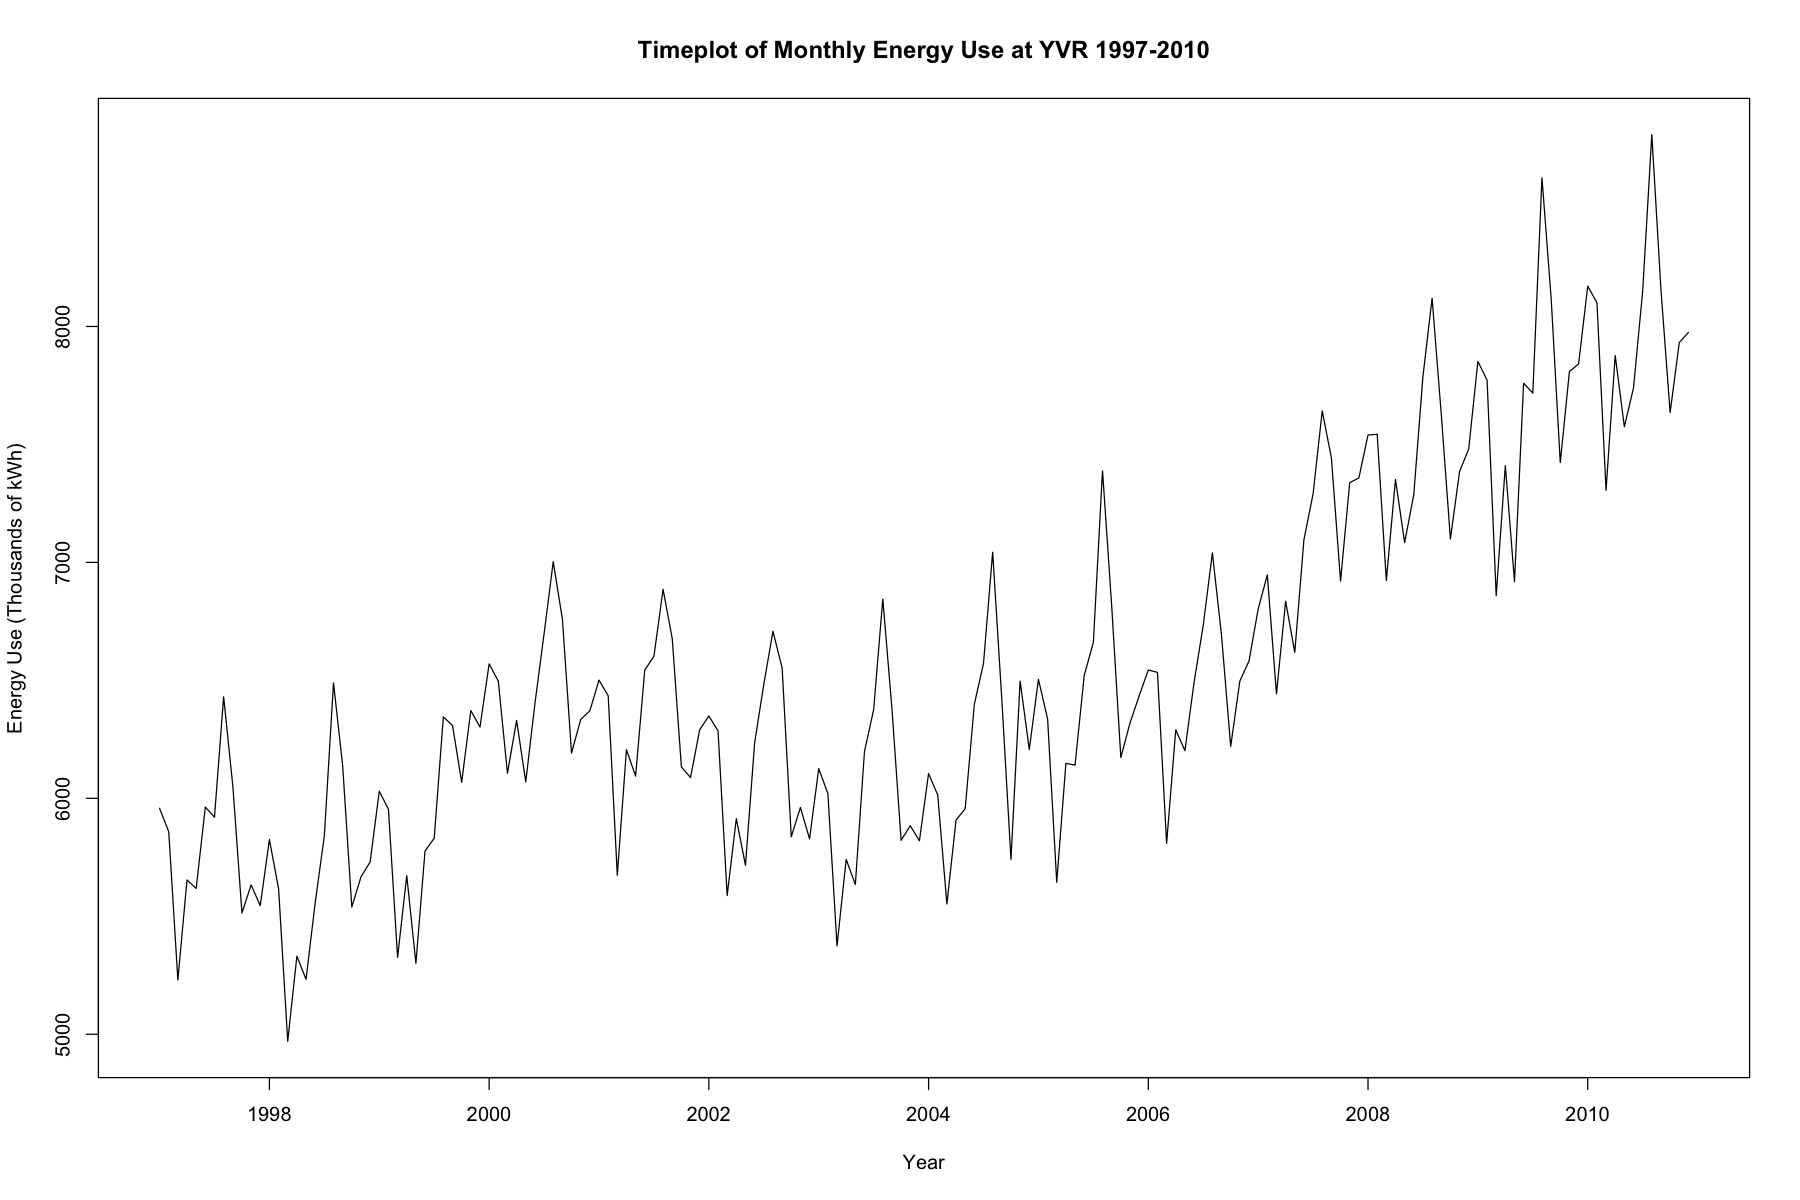

In [730]:
options(repr.plot.width=15, repr.plot.height=10)

plot(energyts, xlab="Year", ylab="Energy Use (Thousands of kWh)", main = "Timeplot of Monthly Energy Use at YVR 1997-2010")


### Box-Cox transformation

[1] 0.6931483

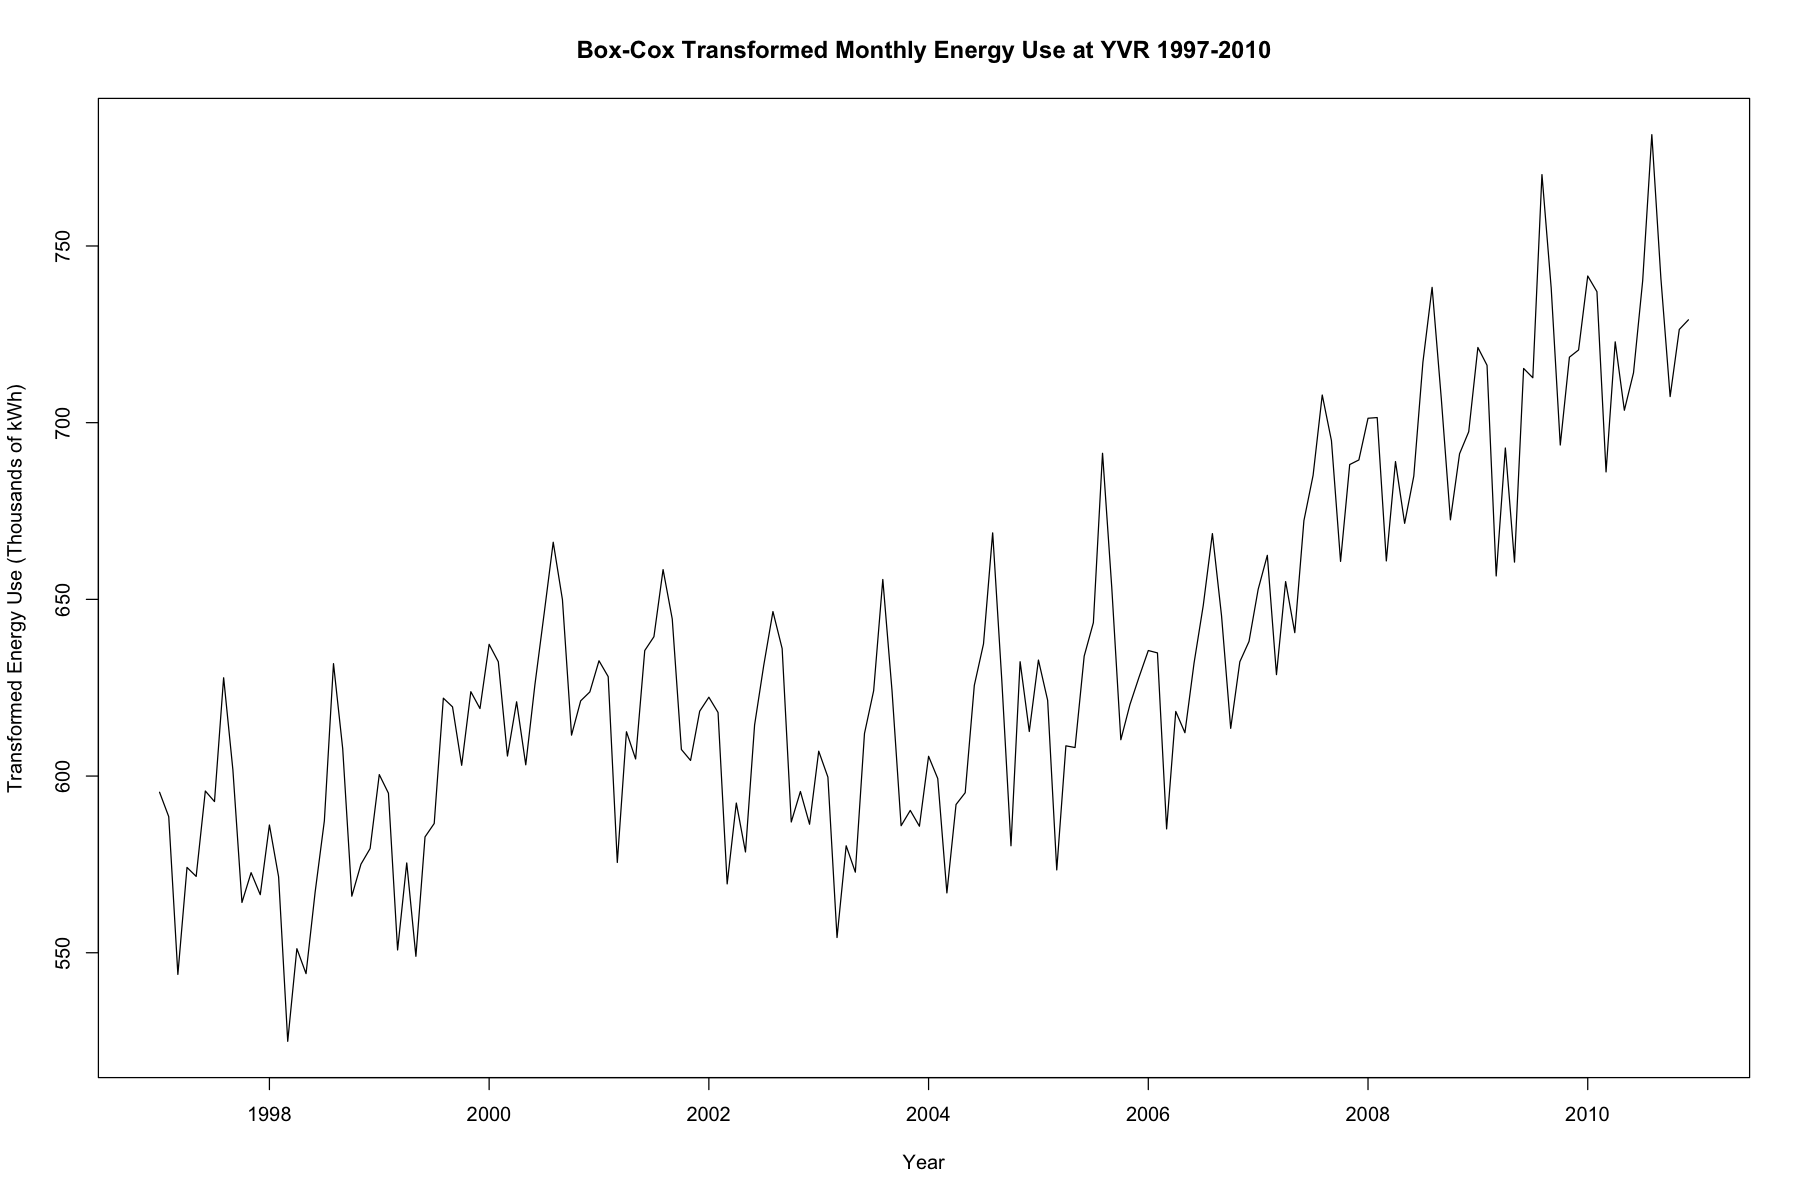

In [731]:
lambda <- BoxCox.lambda(energyts) # = approximately 0.6931
# here we are allowing R to select the "best" value for lambda to make variance equal
lambda
plot(BoxCox(energyts,lambda), ylab="Transformed Energy Use (Thousands of kWh)",
     xlab="Year", main="Box-Cox Transformed Monthly Energy Use at YVR 1997-2010")

#### Seasonal Plots before and after Box-Cox Transformation to check Varaince

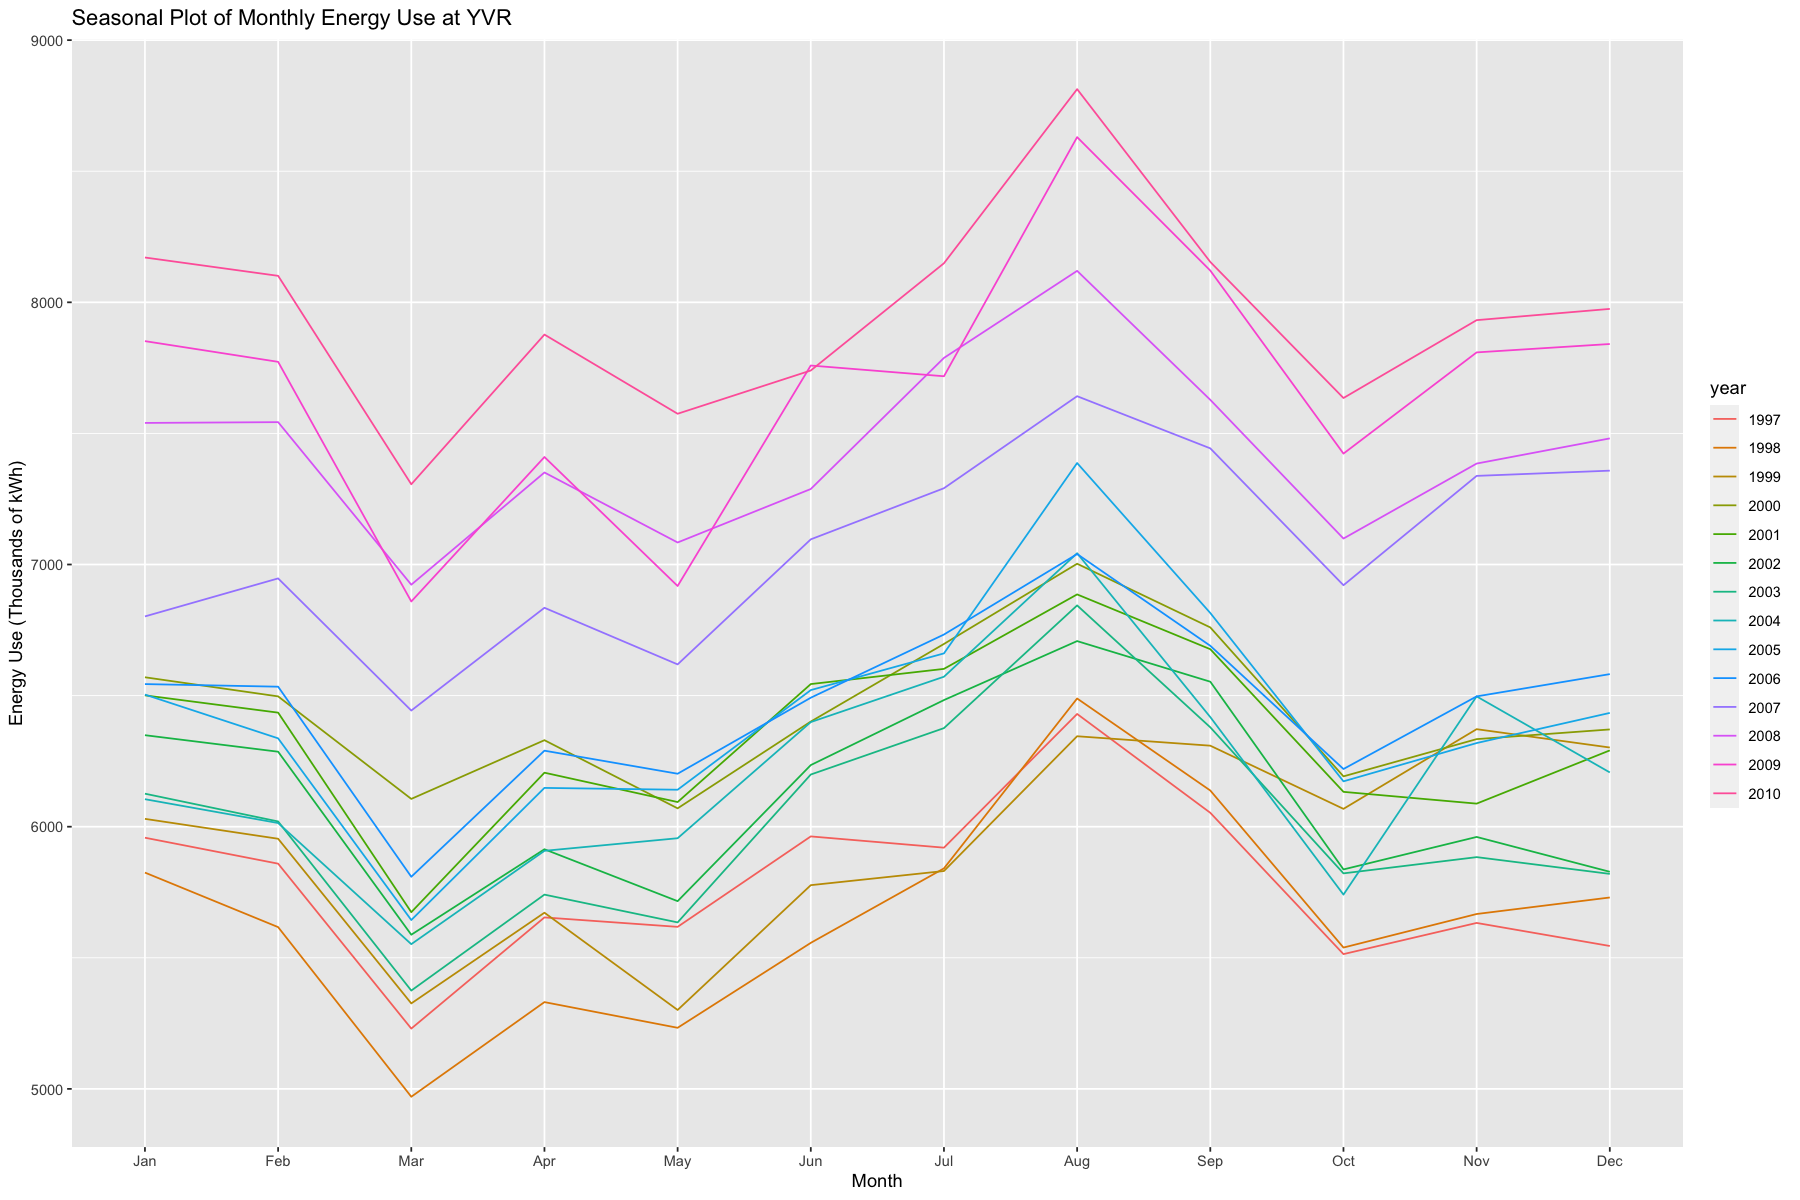

In [732]:
ggseasonplot(energyts, ylab = "Energy Use (Thousands of kWh)", main = "Seasonal Plot of Monthly Energy Use at YVR")

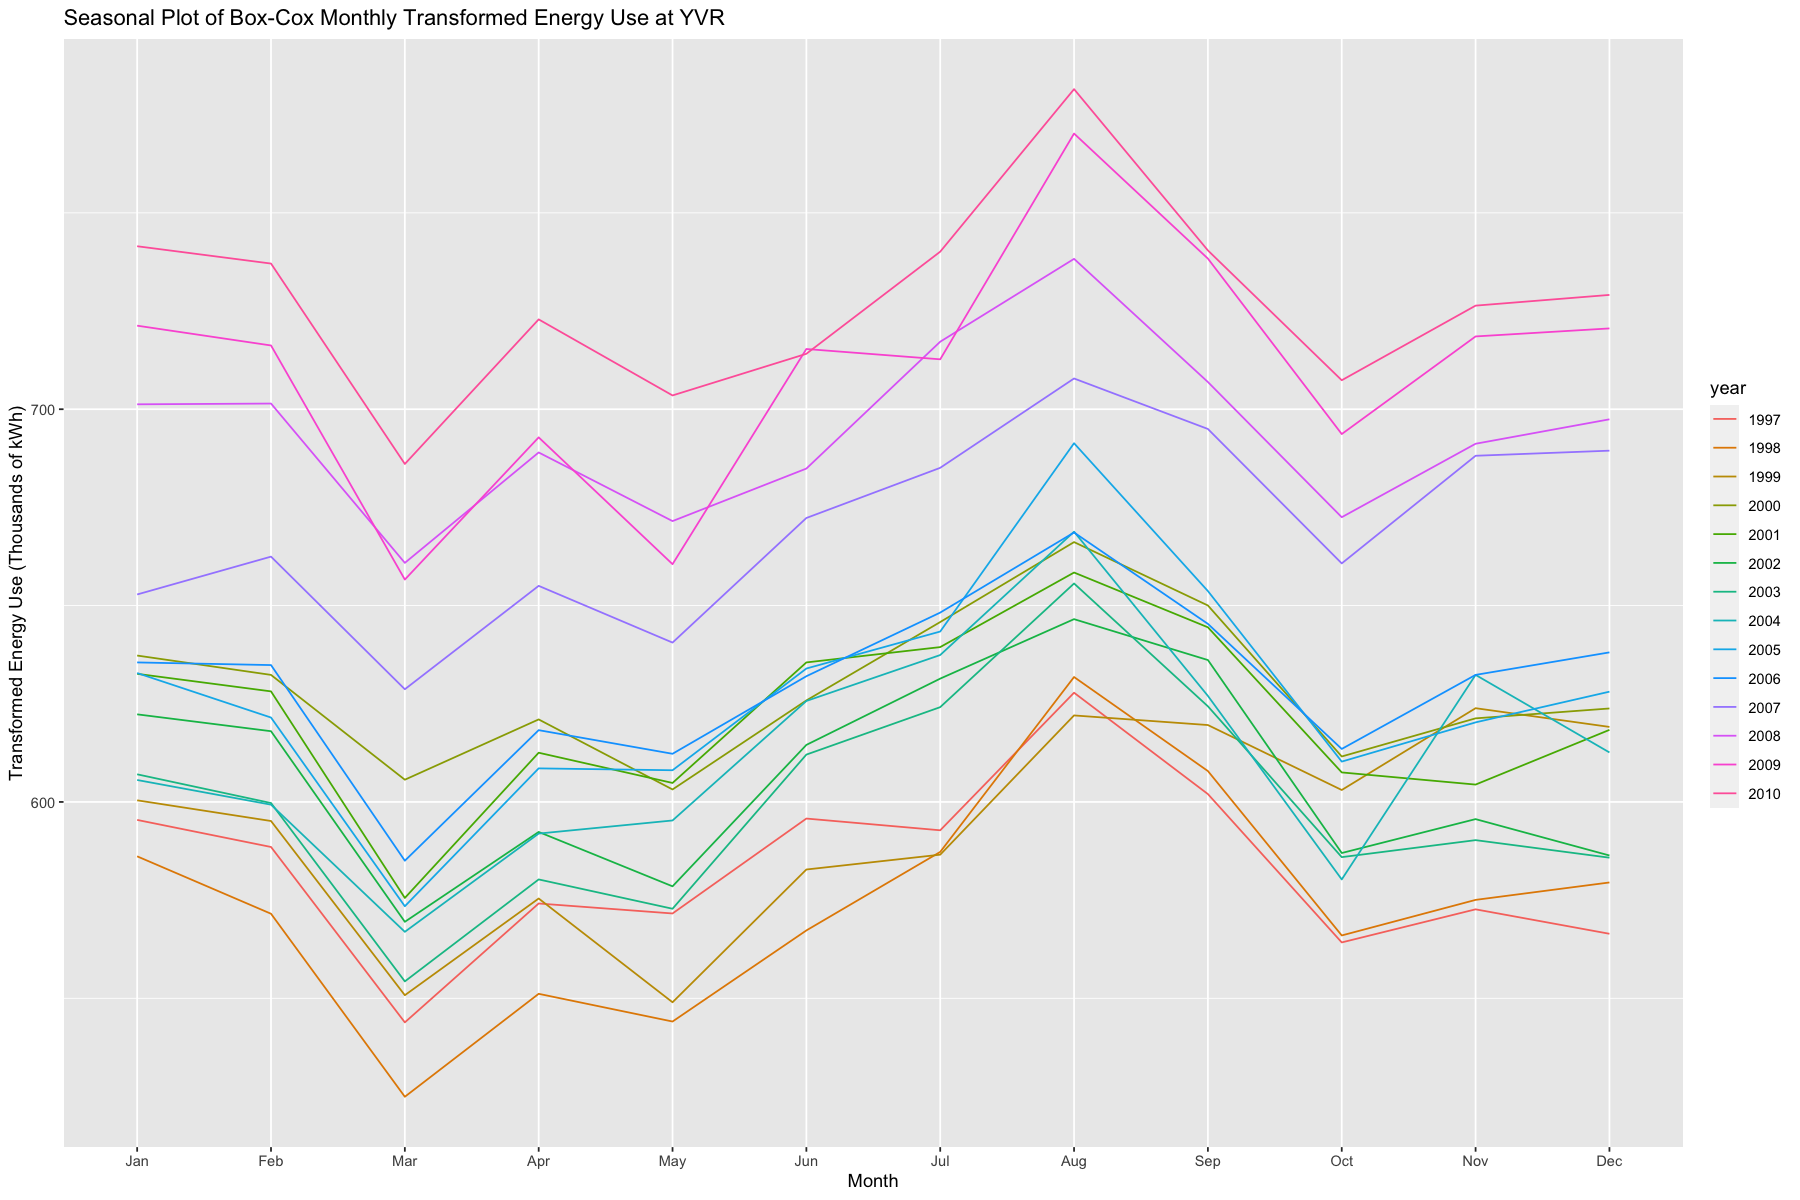

In [733]:
ggseasonplot(BoxCox(energyts,lambda), ylab = "Transformed Energy Use (Thousands of kWh)", main = "Seasonal Plot of Box-Cox Monthly Transformed Energy Use at YVR")


### Calendar adjustment for number of days in each month

null device 
          1

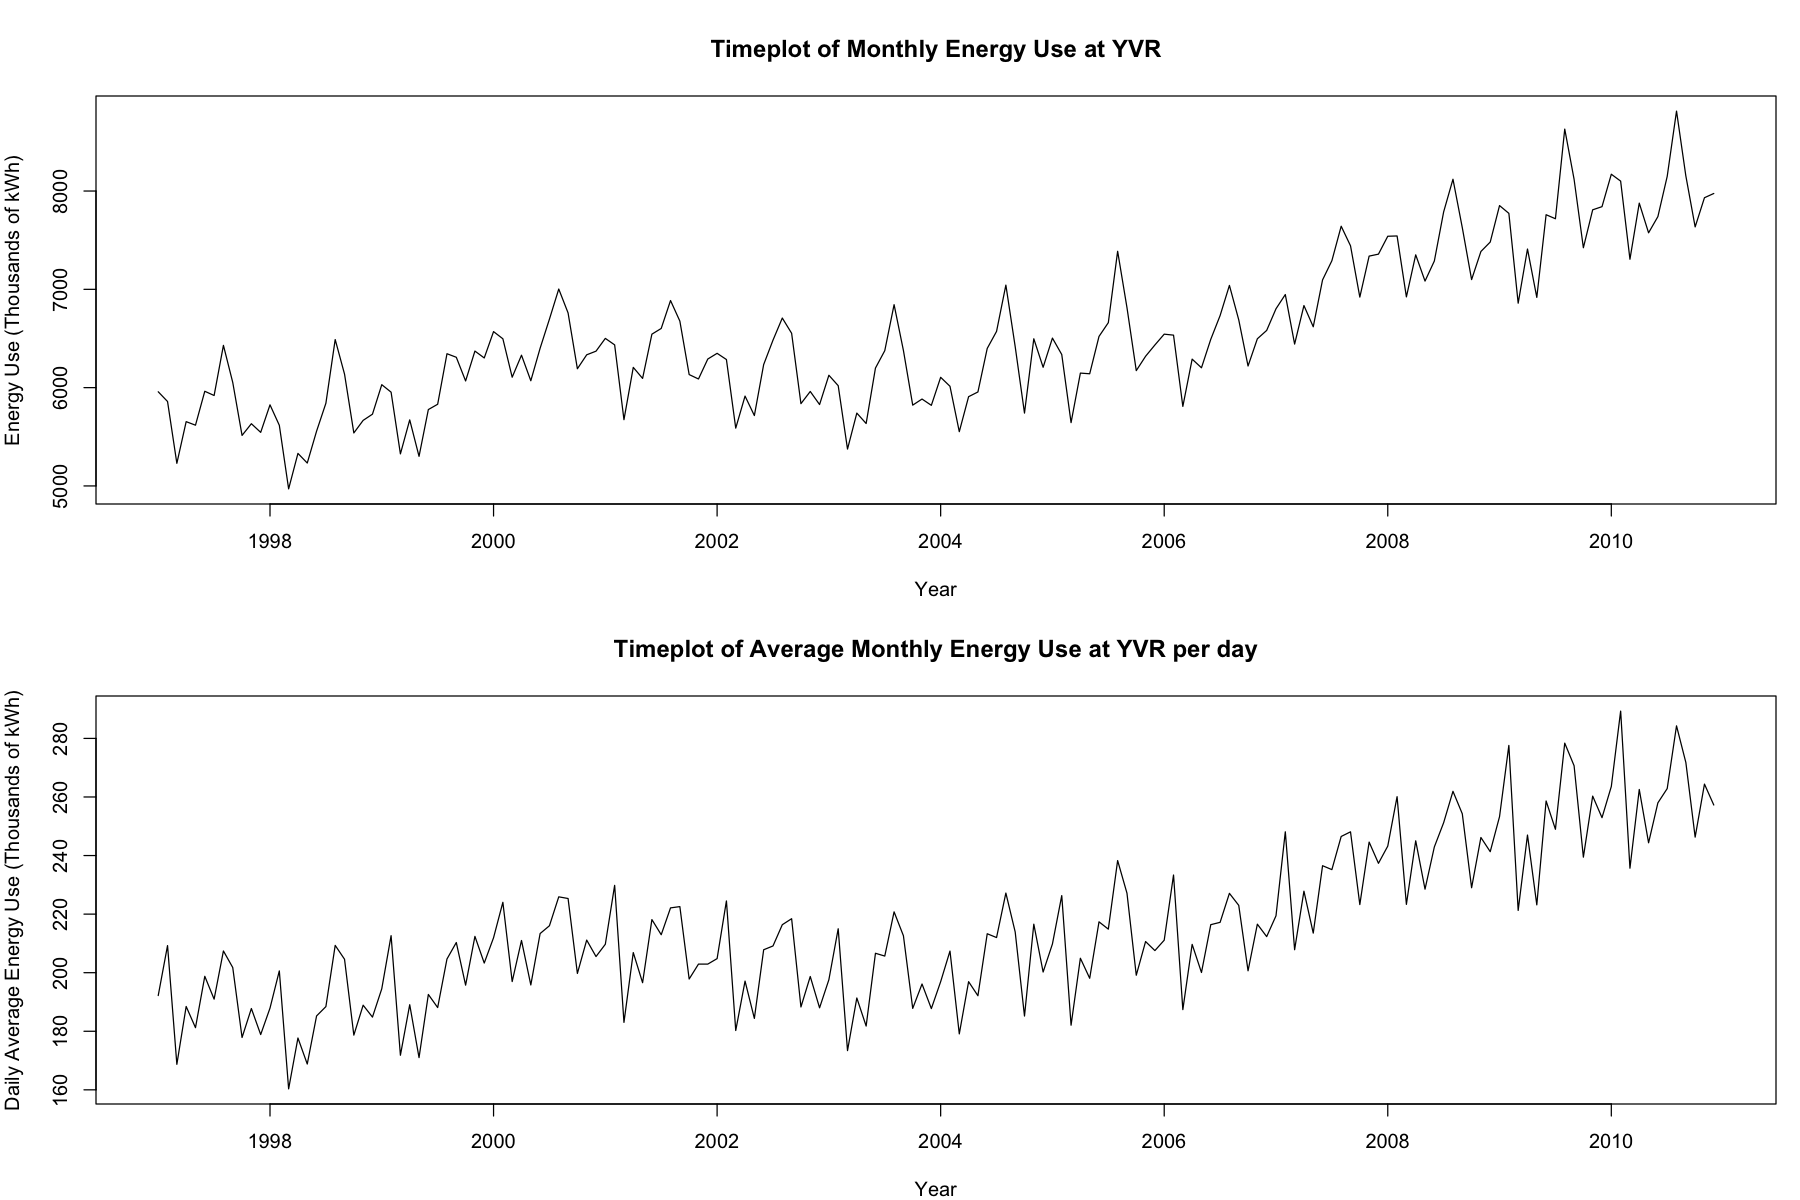

In [734]:
par(mfrow=c(2,1), mar=c(4,4,4,1))
plot(energyts, main="Timeplot of Monthly Energy Use at YVR", ylab="Energy Use (Thousands of kWh)",xlab="Year")
plot(energyts/monthdays(energyts), main="Timeplot of Average Monthly Energy Use at YVR per day", ylab="Daily Average Energy Use (Thousands of kWh)", xlab="Year")

dev.off()

### Divide the data into the training set and the test set

In [735]:
energyts.training <- window(energyts, end=c(2007,12)) # by default will use start = beginning of dataset
energyts.test <- window(energyts, start=c(2008,1)) # by default will use end = end of dataset

----

<div class="alert alert-block alert-info">   

# Part B
### Note that Part B includes everything below this header
<a id="PartB"></a>  

</div>

<div class="alert alert-block alert-danger">
    
### Make sure that your code is organized and includes useful annotations and written descriptions of what you are seeing on plots or the conclusions that you are drawing. (0.5 marks)
  
### Prepare all plots for publication by including detailed axis labels.
    
### Complete anwers will include observations and conclusions/interpretations.
<div>

<div class="alert alert-block alert-success">
<a id="Introduction"></a>  

# Introduction & Approach (250 words max.) (2 marks)
Write an introduction to the project and explain the overall approach.  

What to include: objective and purpose of the analysis, background information, brief description of the approach that is being taken in the analysis. If you include any references, please put the bibliographical information at the end of your introduction; this does not contribute to the word count. **Make sure to write in your own words.**  

</div>

## Introduction:

#### The objective of this project is to build a forecasting model to accurately predict the monthly energy use at Vancouver Airport (YVR) three years into the future. With 2 million passengers on average flying in and out of YVR monthly, the purpose of forecasting is to track their energy usage to remain sustainable. YVR plans to become net-zero by 2030, therefore, forecasting energy usage will help the airport to effectively plan their carbon emissions and expand their use of renewable sources of energy. We are provided with 13 years of historical monthly energy use data; out of this we will use 10 years of data for training the model and 3 years for testing. We will then use the test set to ensure that we can predict 3 years into the future as closely as possible. To approach this, we will first understand the trend, seasonality, and unusual features present in the data by using STL decomposition. Second, we will use basic forecasting models such as Mean, Drift, Naive, and Seasonal Naive methods to fit the data. Lastly, we will explore several ETS and ARIMA models to find the best fit for the data (appendix) and based on our findings we will finally compare the accuracy measures, that is, RMSE, MAE, MAPE, and MASE for all the 6 model's forecast on the test dataset. Once we have the best model, we will predict 3 years into the future and present that data to the airport.

#### Bibliography:
##### https://dailyhive.com/vancouver/vancouver-international-airport-yvr-may-2022-passenger-volumes
##### https://www.yvr.ca/en/about-yvr/environment

----

<div class="alert alert-block alert-warning">
<a id="EDA1"></a>

# Exploratory Data Analysis (300 words max.) (4 marks)  

Create plots of the electricity use data (**use all the data, not just the training set**); prepare them as if for publication and upload them. Include a decomposition plot from STL decomposition.  

Describe the characteristics of trend, cycle and seasonality in detail, referring to specific characteristics of the plots. Also mention any unusual features, if present. Be specific.  

<br>

Organize your answers as follows:  

Seasonality: ...  
    
Trend/cycle: ...  

Unusual features: ...  
</div>

#### Seasonality:  From the time series, seasonal and subseries plot, the data display seasonal peak in the month August which is the hottest month in Vancouver, and the travel is increased as the school year begins. The valley is displayed in the months of October when the temperature lowers, and travel is comparatively less. In further analysis, the ACF plot shows an increase at every 12th lag indicating a frequency of 12 for the seasonality in the monthly energy use at YVR data. 

#### Trend: There is both an increasing and decreasing trend in the time series plot. The use of STL decomposition smoothens the pattern and we can infer that there in an overall increasing trend in the monthly energy use at YVR. Further, the ACF Plot displays a wavy pattern indicating both seasonality and trend in the data set. 

#### Unusual Features: From the seasonal plot, we can infer that the years 1999 and 2009 has an inconsistent pattern in seasonality with the rest of the years. For the year 1999, the seasonality is showing peaks and valleys consistent with the years till the month of August and then increases or remains constant for the rest of the year, this could be attributed to cold weather pattern in 1999 where the energy use is higher for the winter months (September, October, November, and December). The year 2009, displays a peak in the month of June which can be due to weather patterns as June could have been hotter than usual in the year 2009. Additionally, year 2007 has had the maximum number of flight crashes which could potentially instill a fear of flying among passengers and thus, shows a decreasing trend in the STL decomposition for the year 2007.

#### Bibliography:
##### https://www.psbr.law/aviation_accident_statistics.html

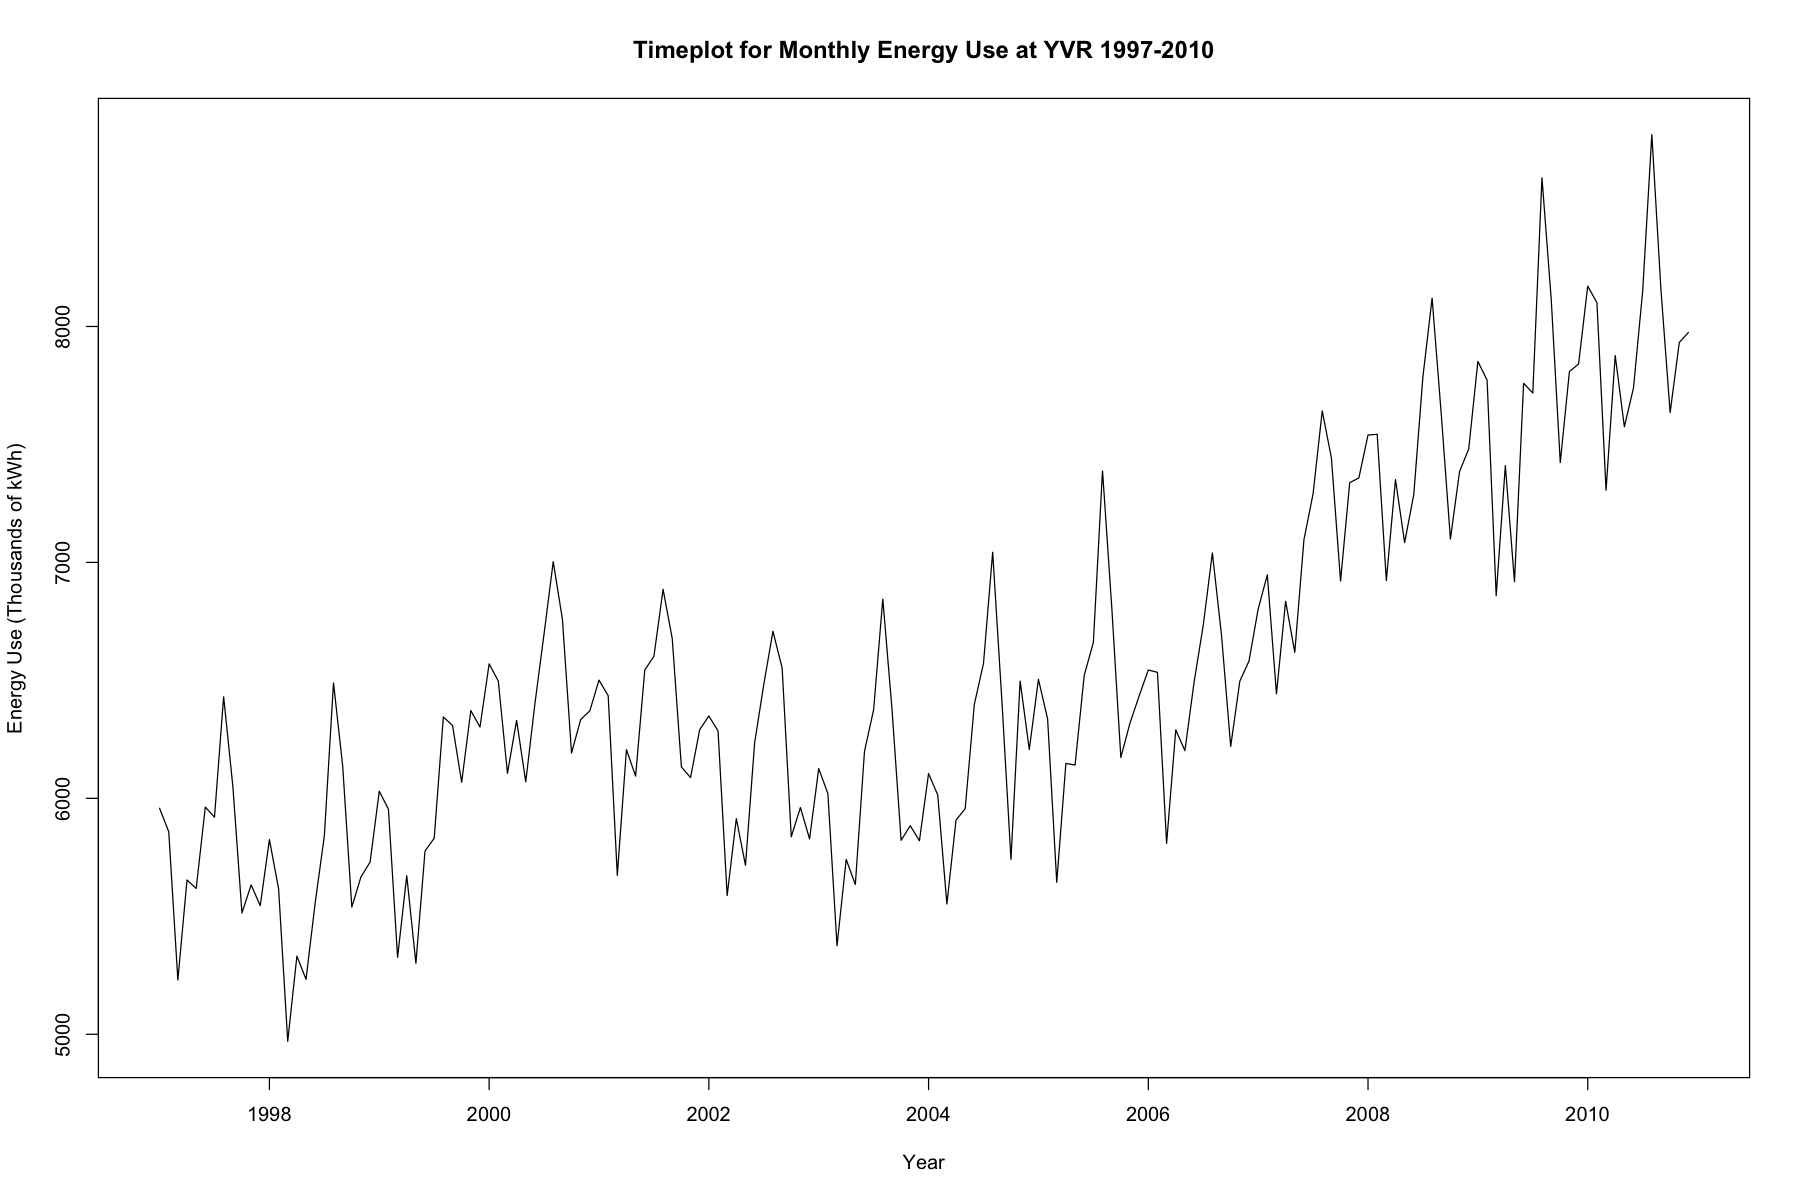

In [736]:
plot(energyts, xlab="Year", ylab="Energy Use (Thousands of kWh)", main = "Timeplot for Monthly Energy Use at YVR 1997-2010")

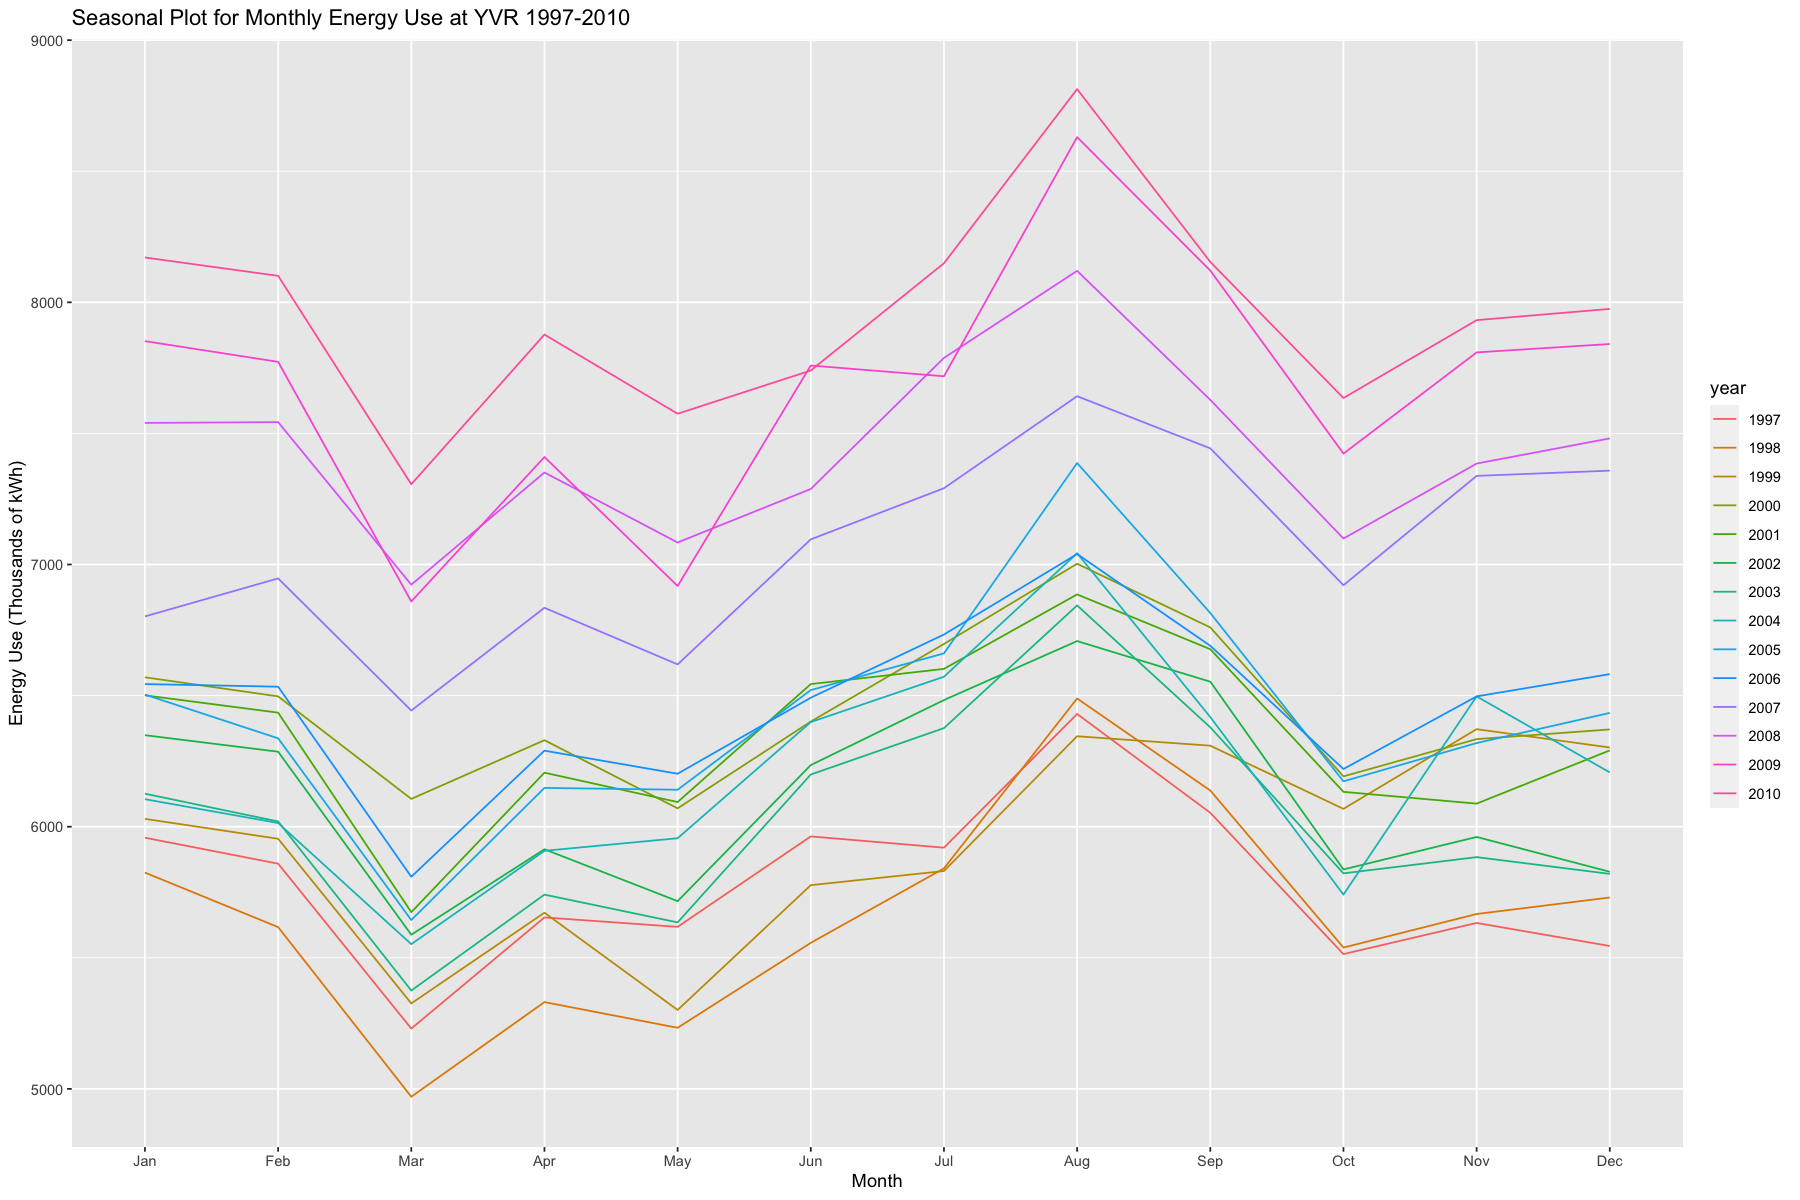

In [737]:
ggseasonplot(energyts, xlab="Month", ylab="Energy Use (Thousands of kWh)", main = "Seasonal Plot for Monthly Energy Use at YVR 1997-2010")

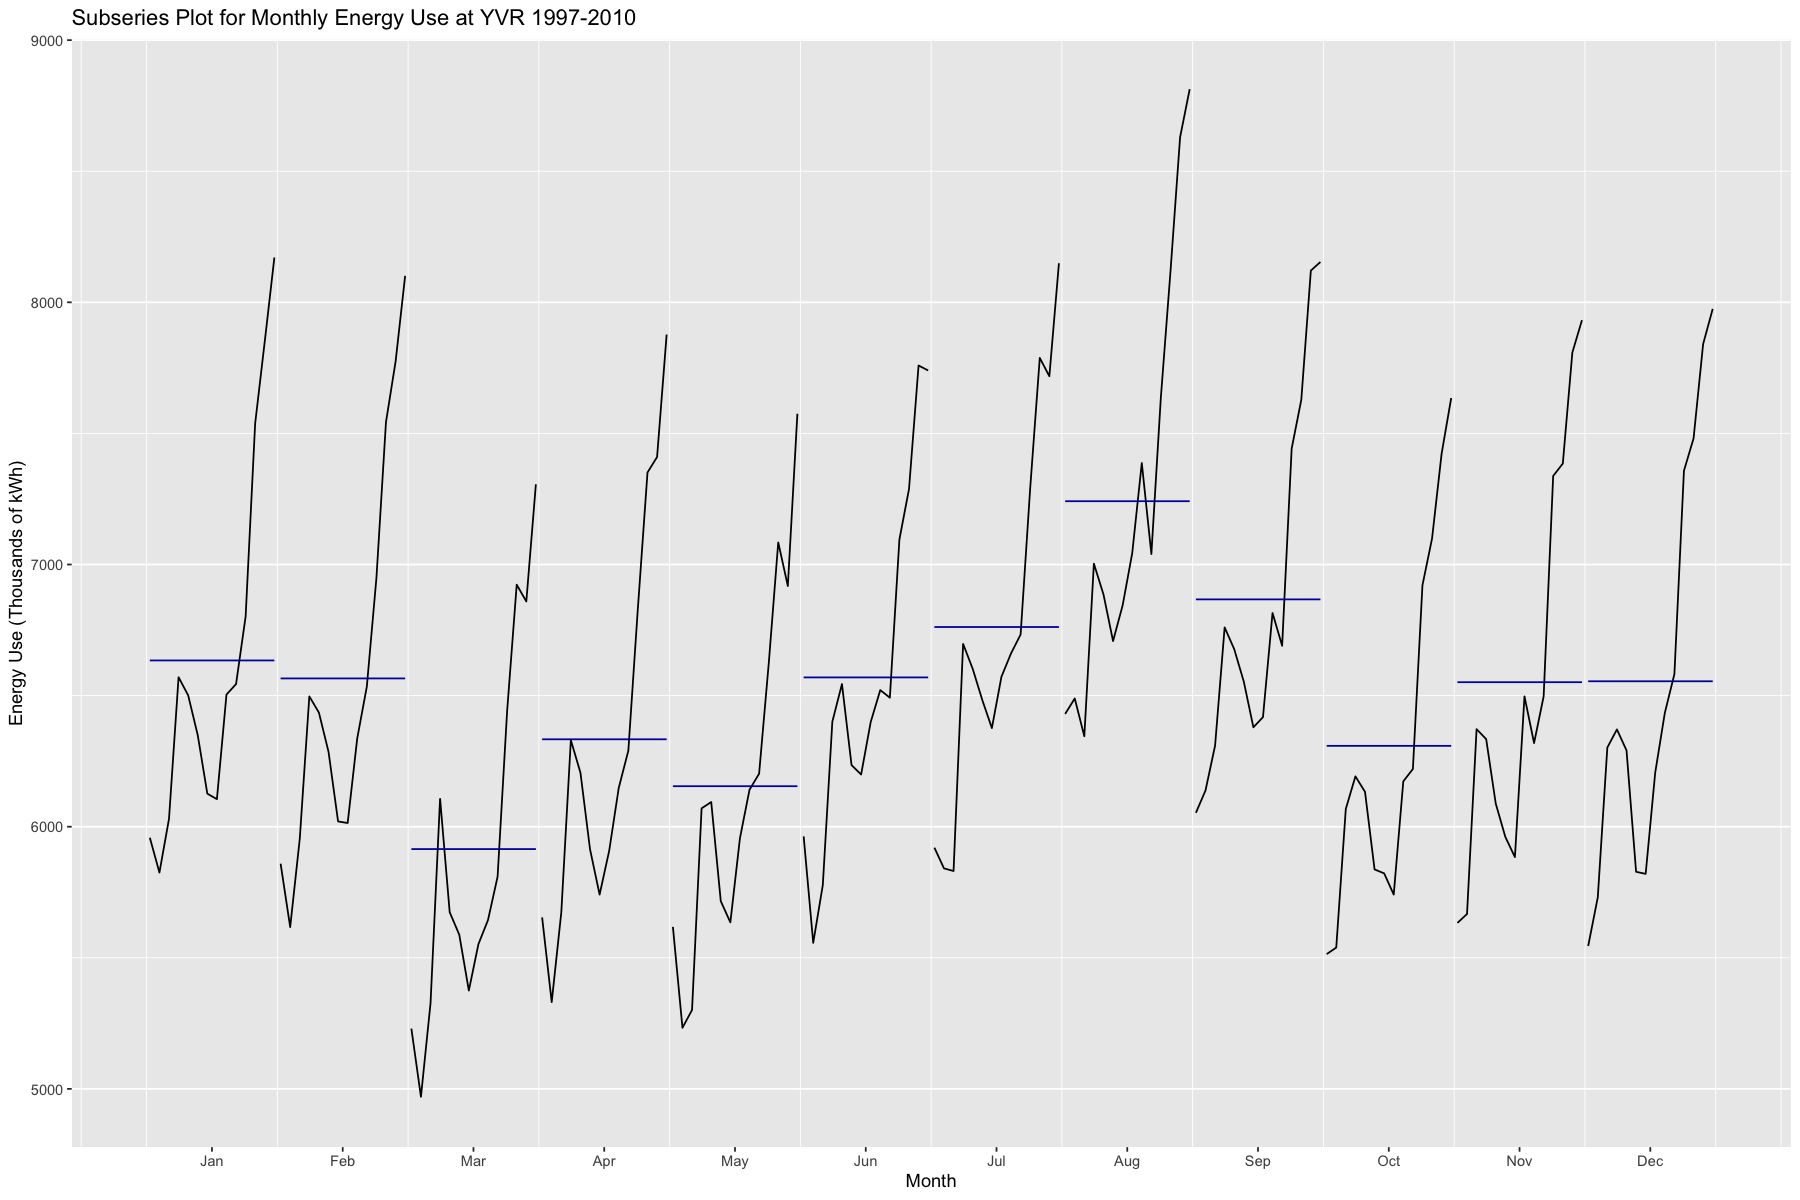

In [738]:
ggsubseriesplot(energyts, , xlab="Month", ylab="Energy Use (Thousands of kWh)", main = "Subseries Plot for Monthly Energy Use at YVR 1997-2010")

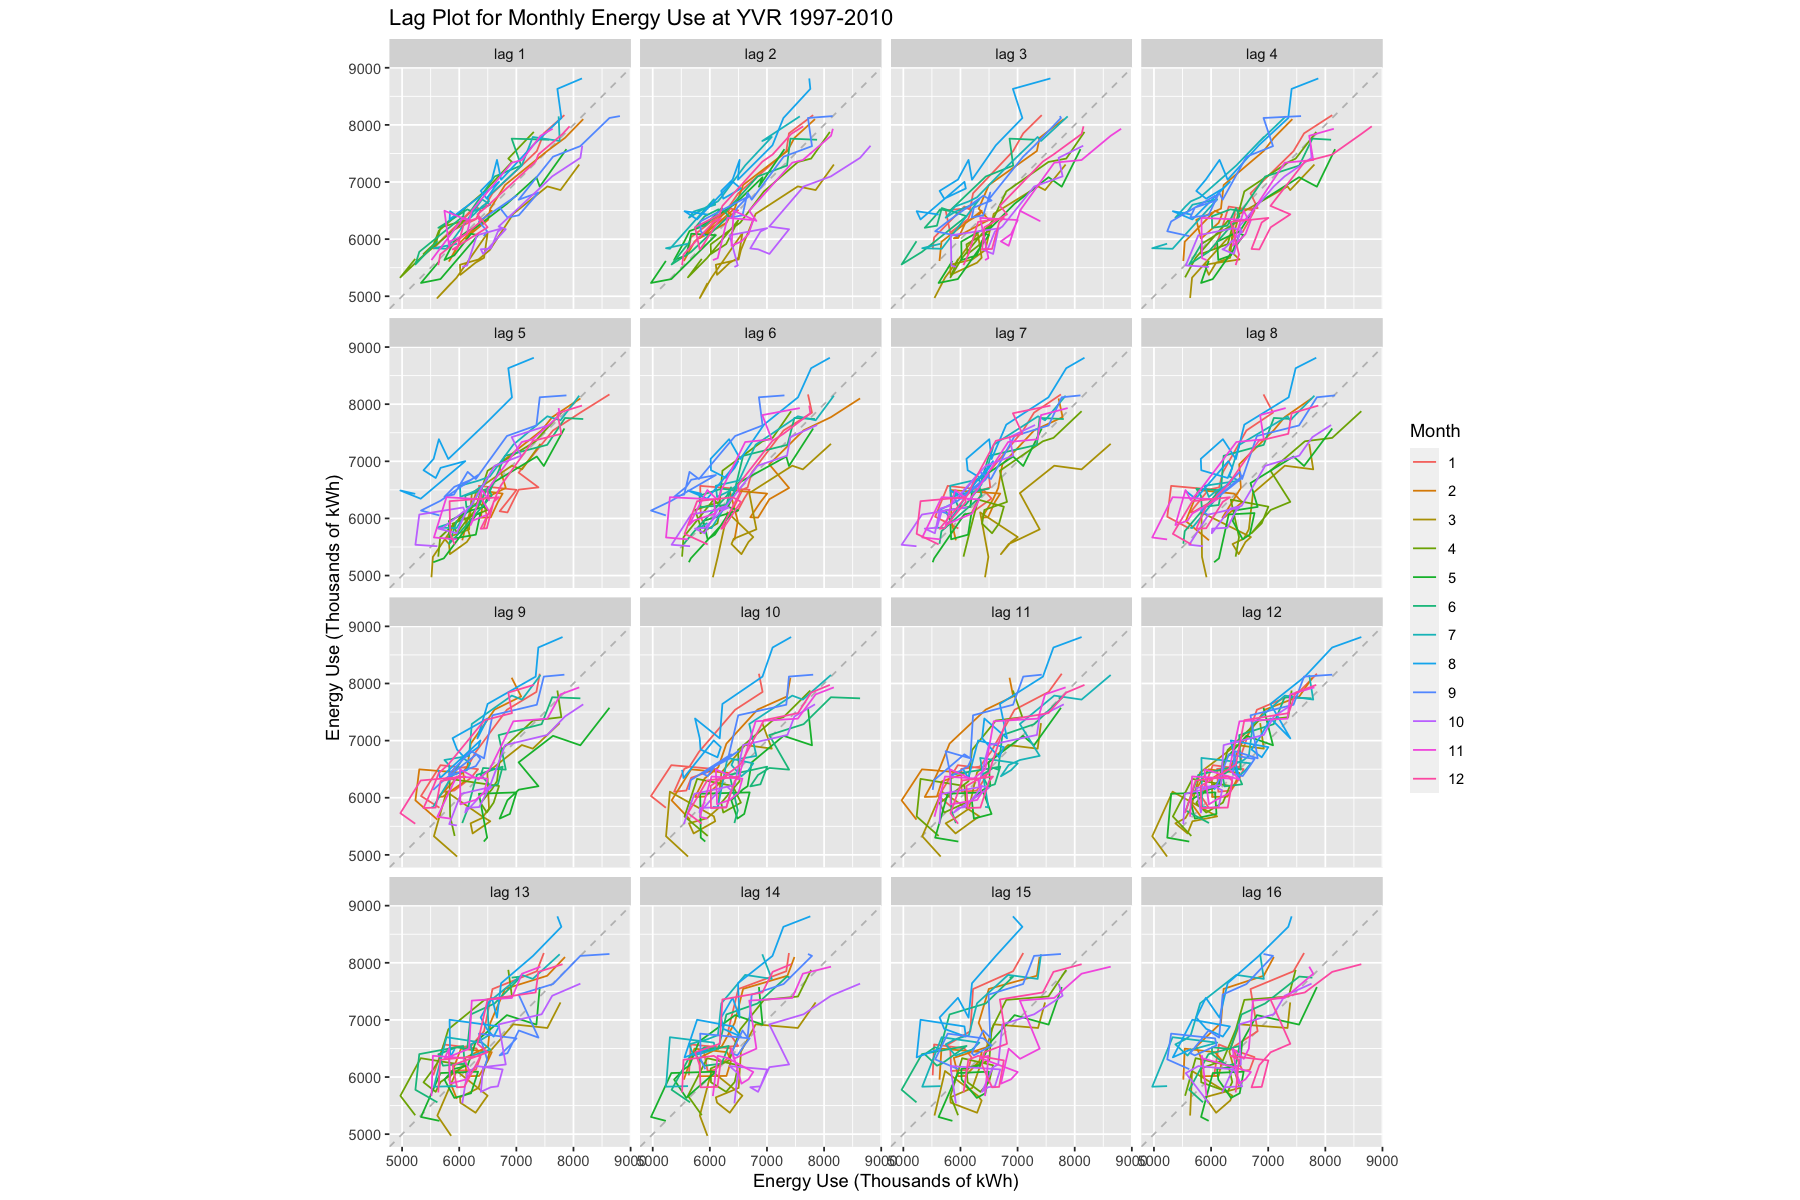

In [739]:
gglagplot(energyts, xlab="Energy Use (Thousands of kWh)", ylab="Energy Use (Thousands of kWh)", main = "Lag Plot for Monthly Energy Use at YVR 1997-2010")

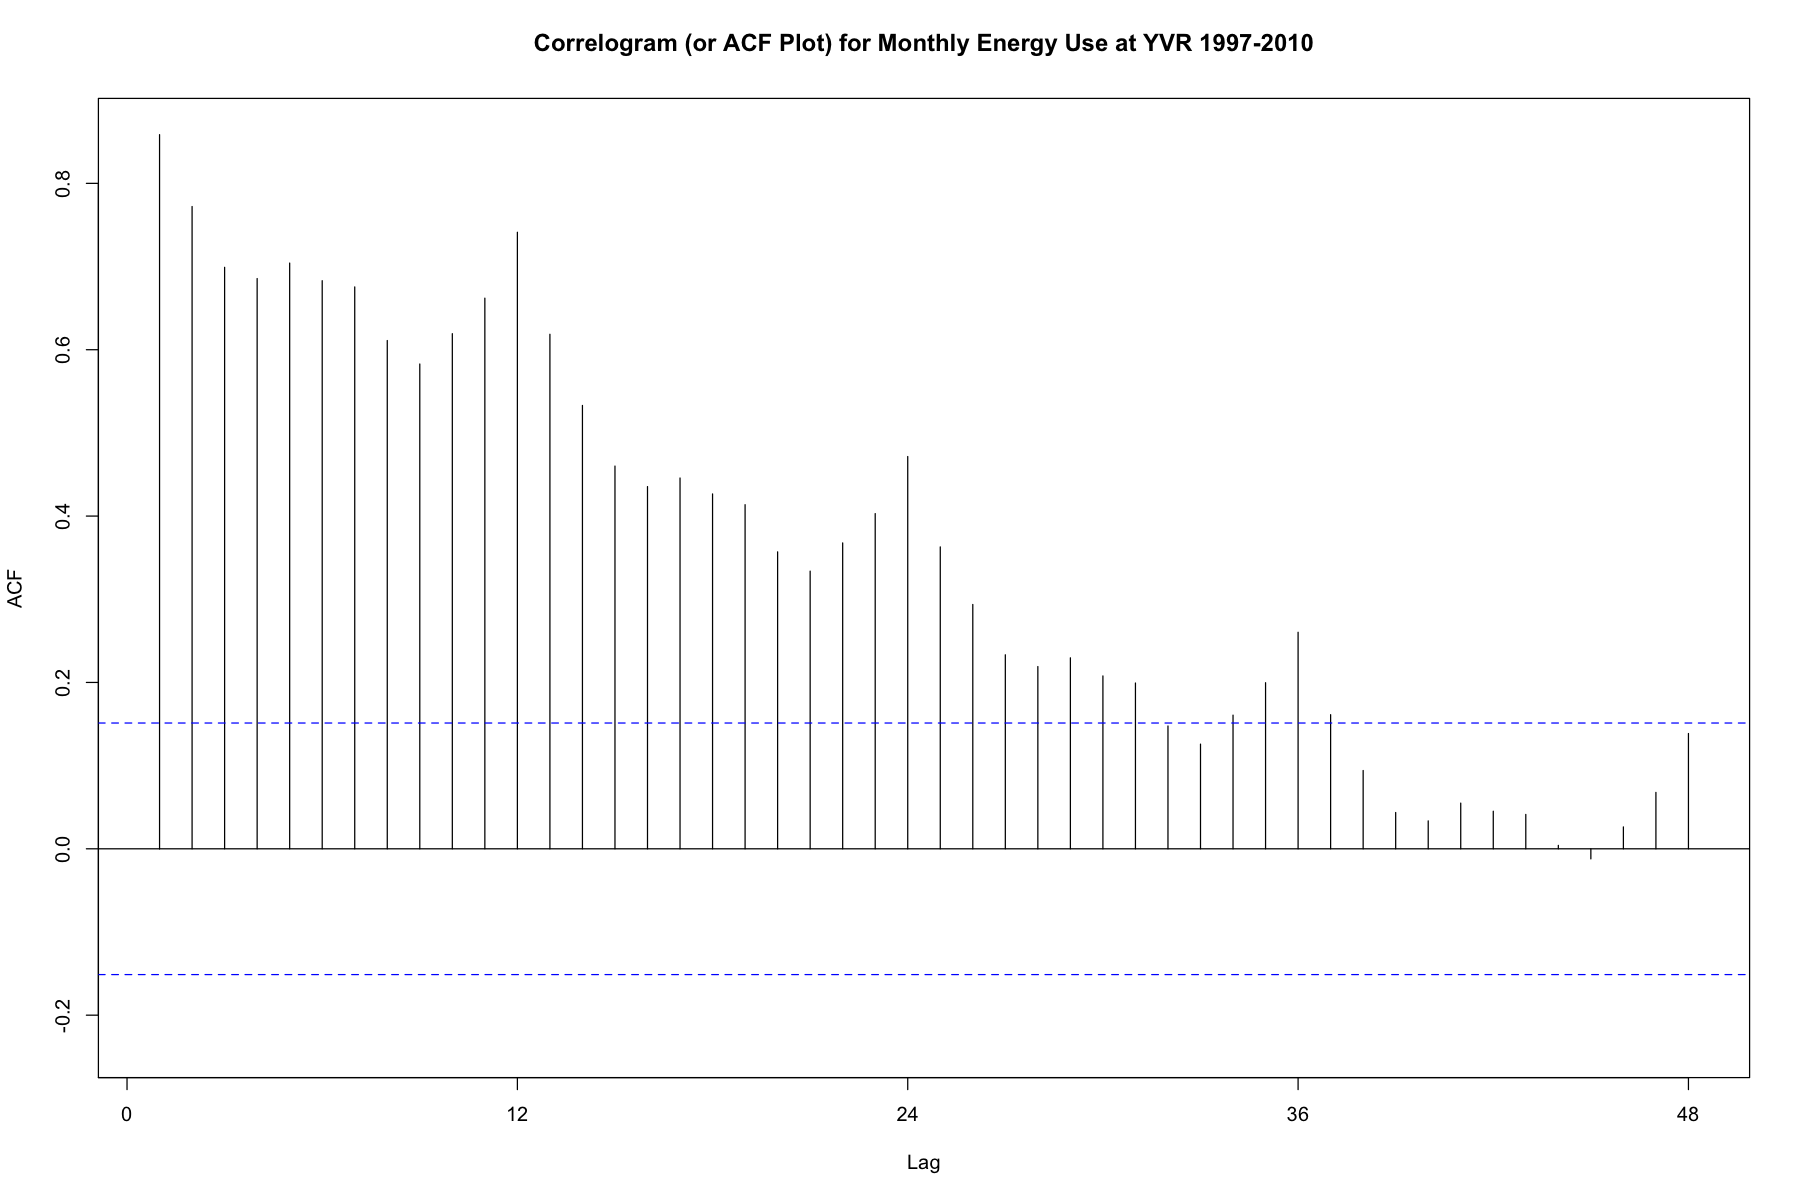

In [740]:
Acf(energyts, lag = 48, main = "Correlogram (or ACF Plot) for Monthly Energy Use at YVR 1997-2010")

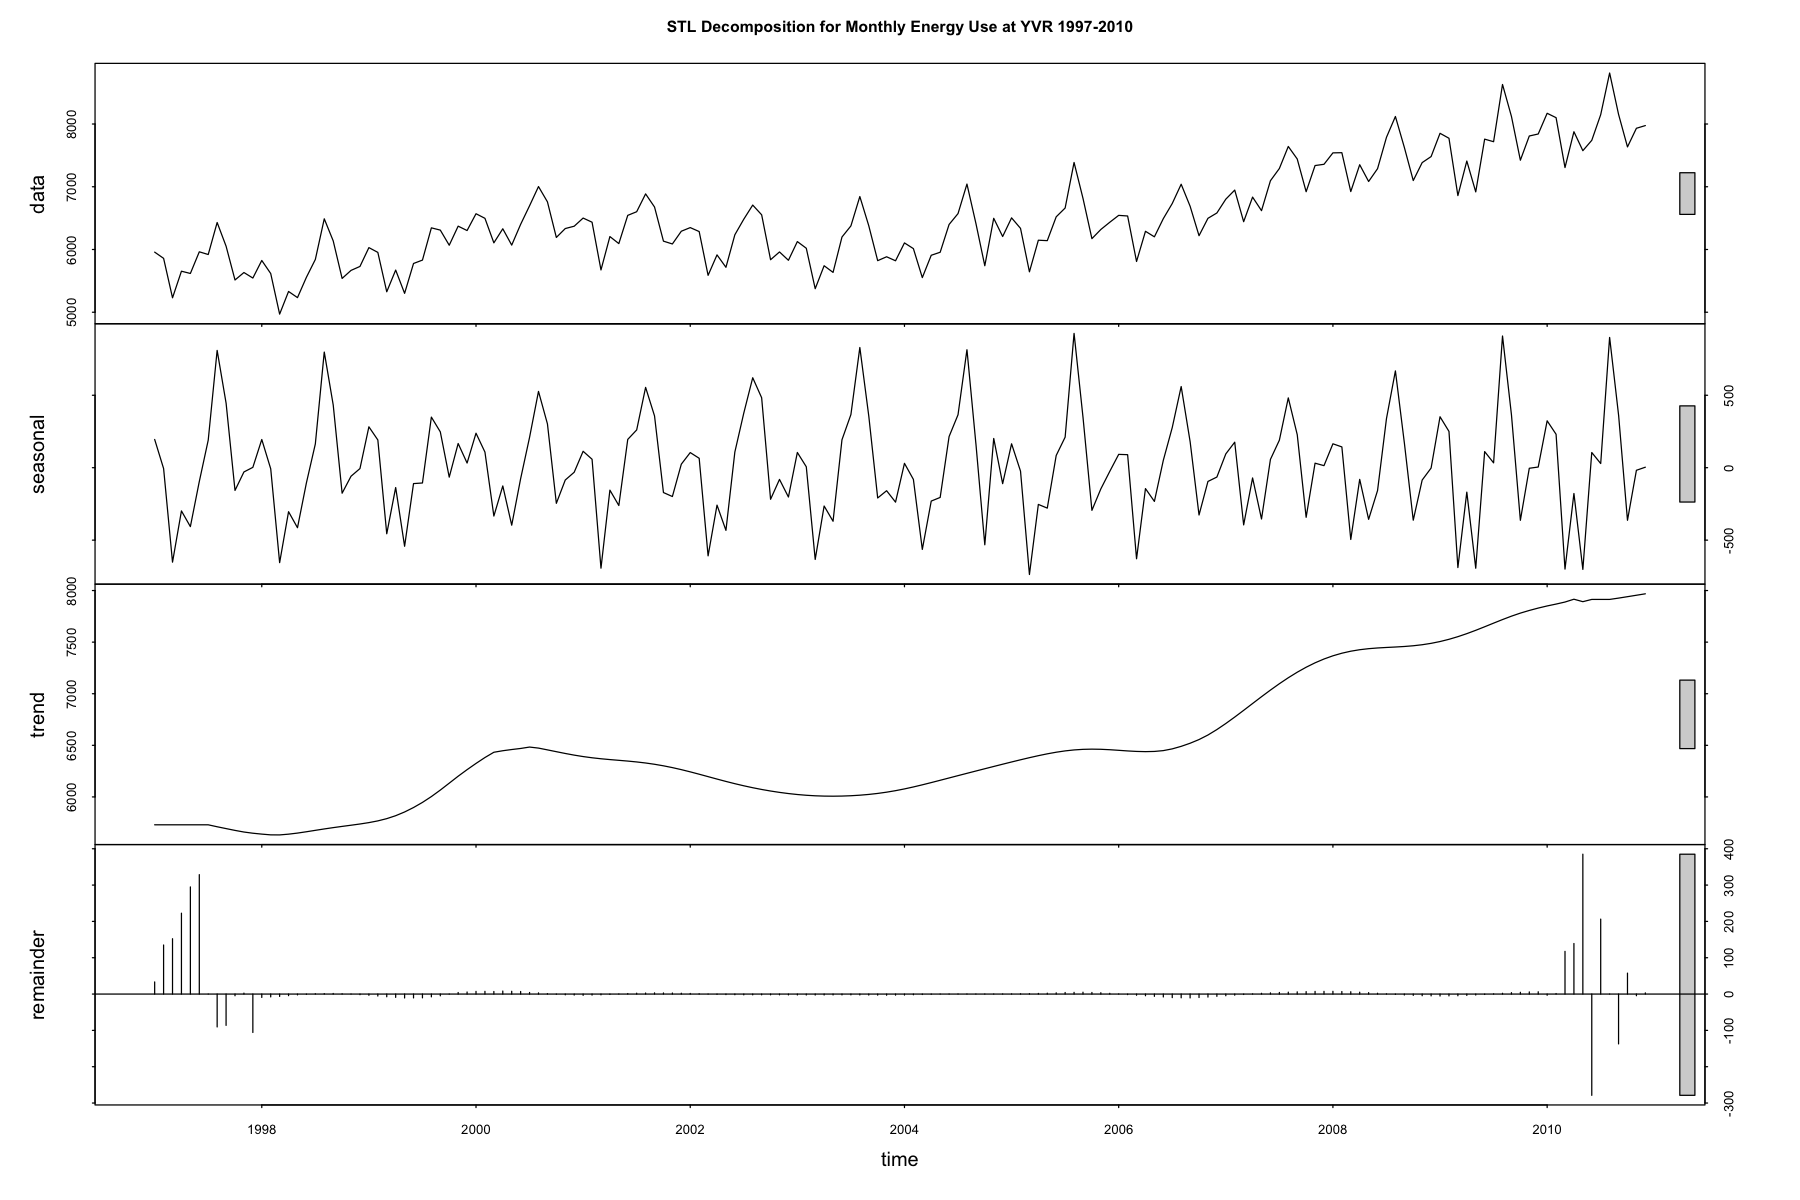

In [741]:
energyts.stl <- stl(energyts, t.window = 9, s.window = 1, robust=TRUE)
plot(energyts.stl, main = "STL Decomposition for Monthly Energy Use at YVR 1997-2010")

<div class="alert alert-block alert-warning">
<a id="Causes"></a>

# Potential causes (300 words max.) (3 marks)

Describe what could be causing the patterns that you are seeing in electricity use. Create any relevant plots and include them. Make sure to discuss any specific features of plots. Remember that the original dataset includes other variables! (300 words max.)  
</div>

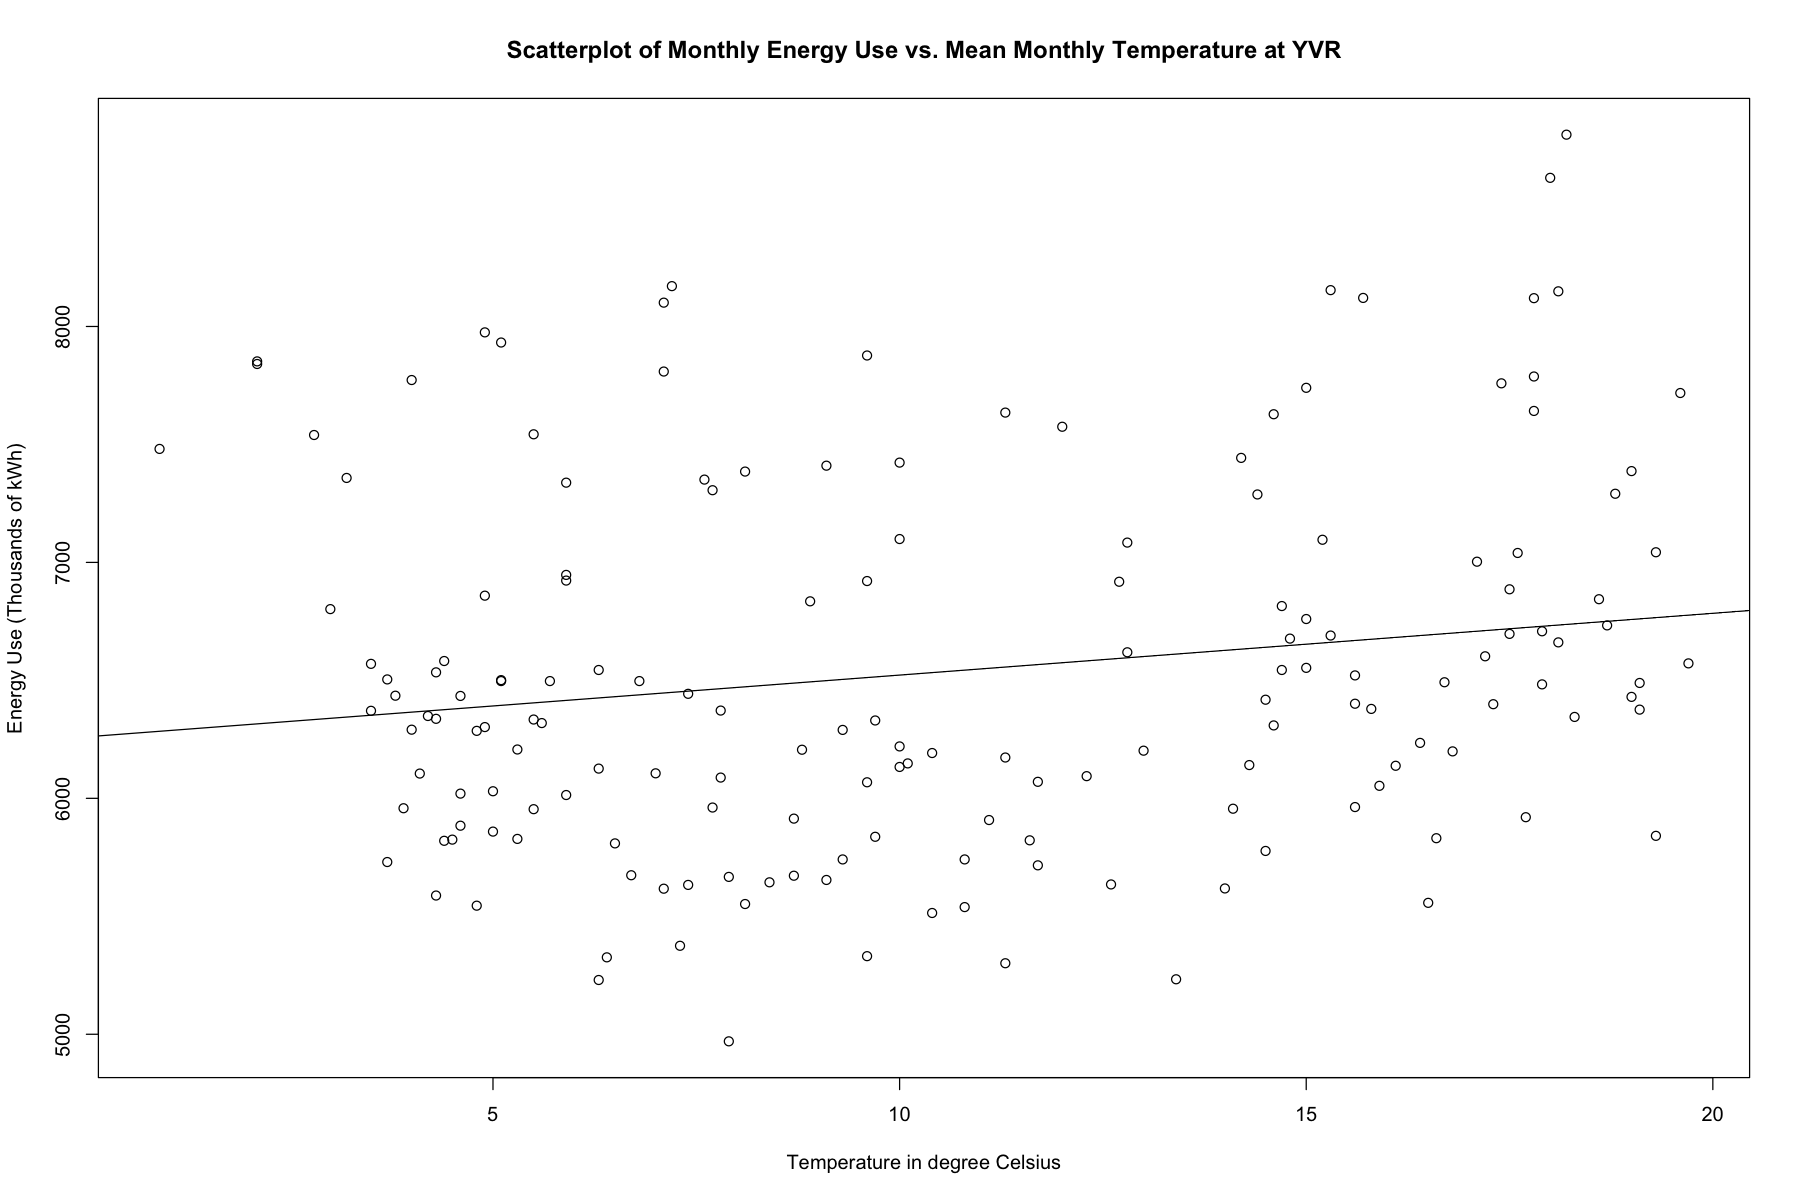

In [742]:
plot(yvr$mean.temp, yvr$energy, xlab="Temperature in degree Celsius", ylab="Energy Use (Thousands of kWh)", main="Scatterplot of Monthly Energy Use vs. Mean Monthly Temperature at YVR")
abline(lm(yvr$energy~yvr$mean.temp))

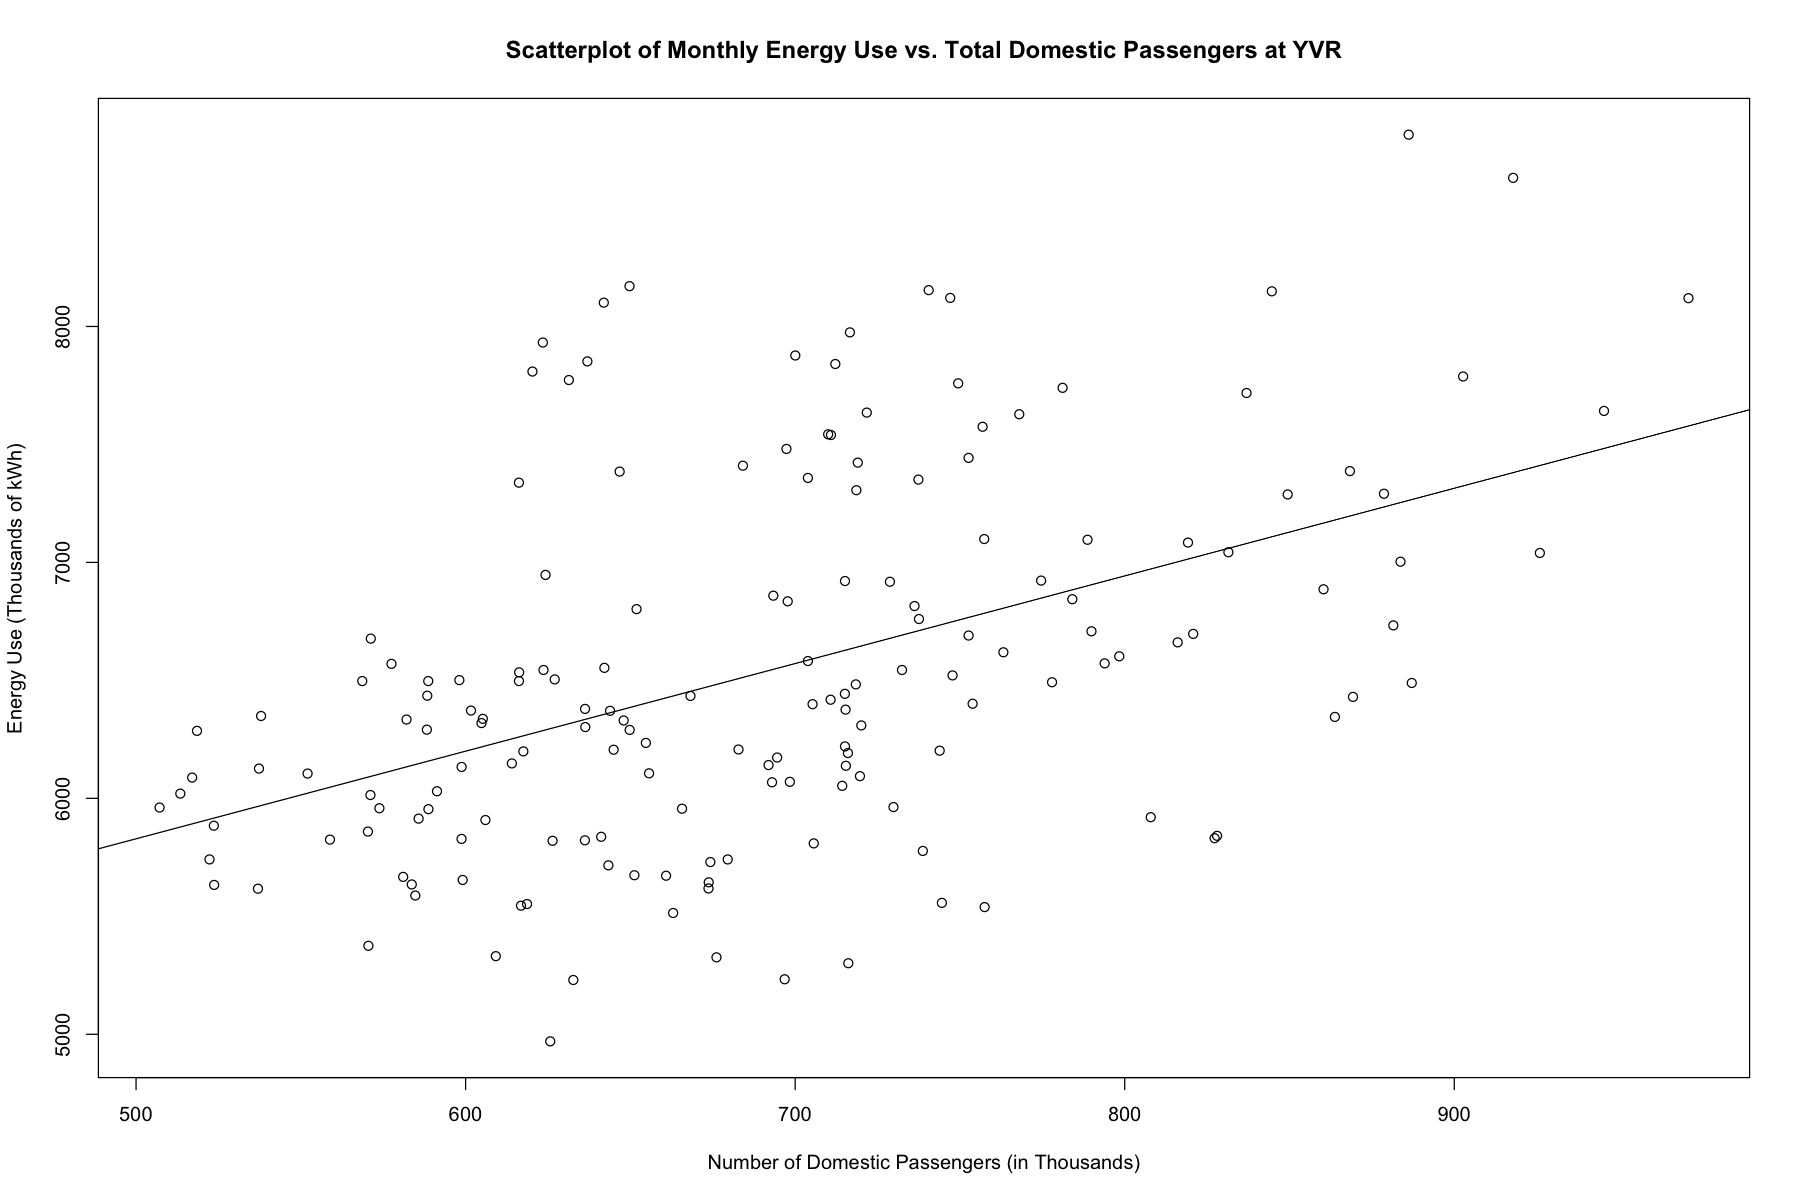

In [743]:
plot(yvr$domestic.passengers, yvr$energy, xlab="Number of Domestic Passengers (in Thousands)", ylab="Energy Use (Thousands of kWh)", main="Scatterplot of Monthly Energy Use vs. Total Domestic Passengers at YVR")
abline(lm(yvr$energy~yvr$domestic.passengers))

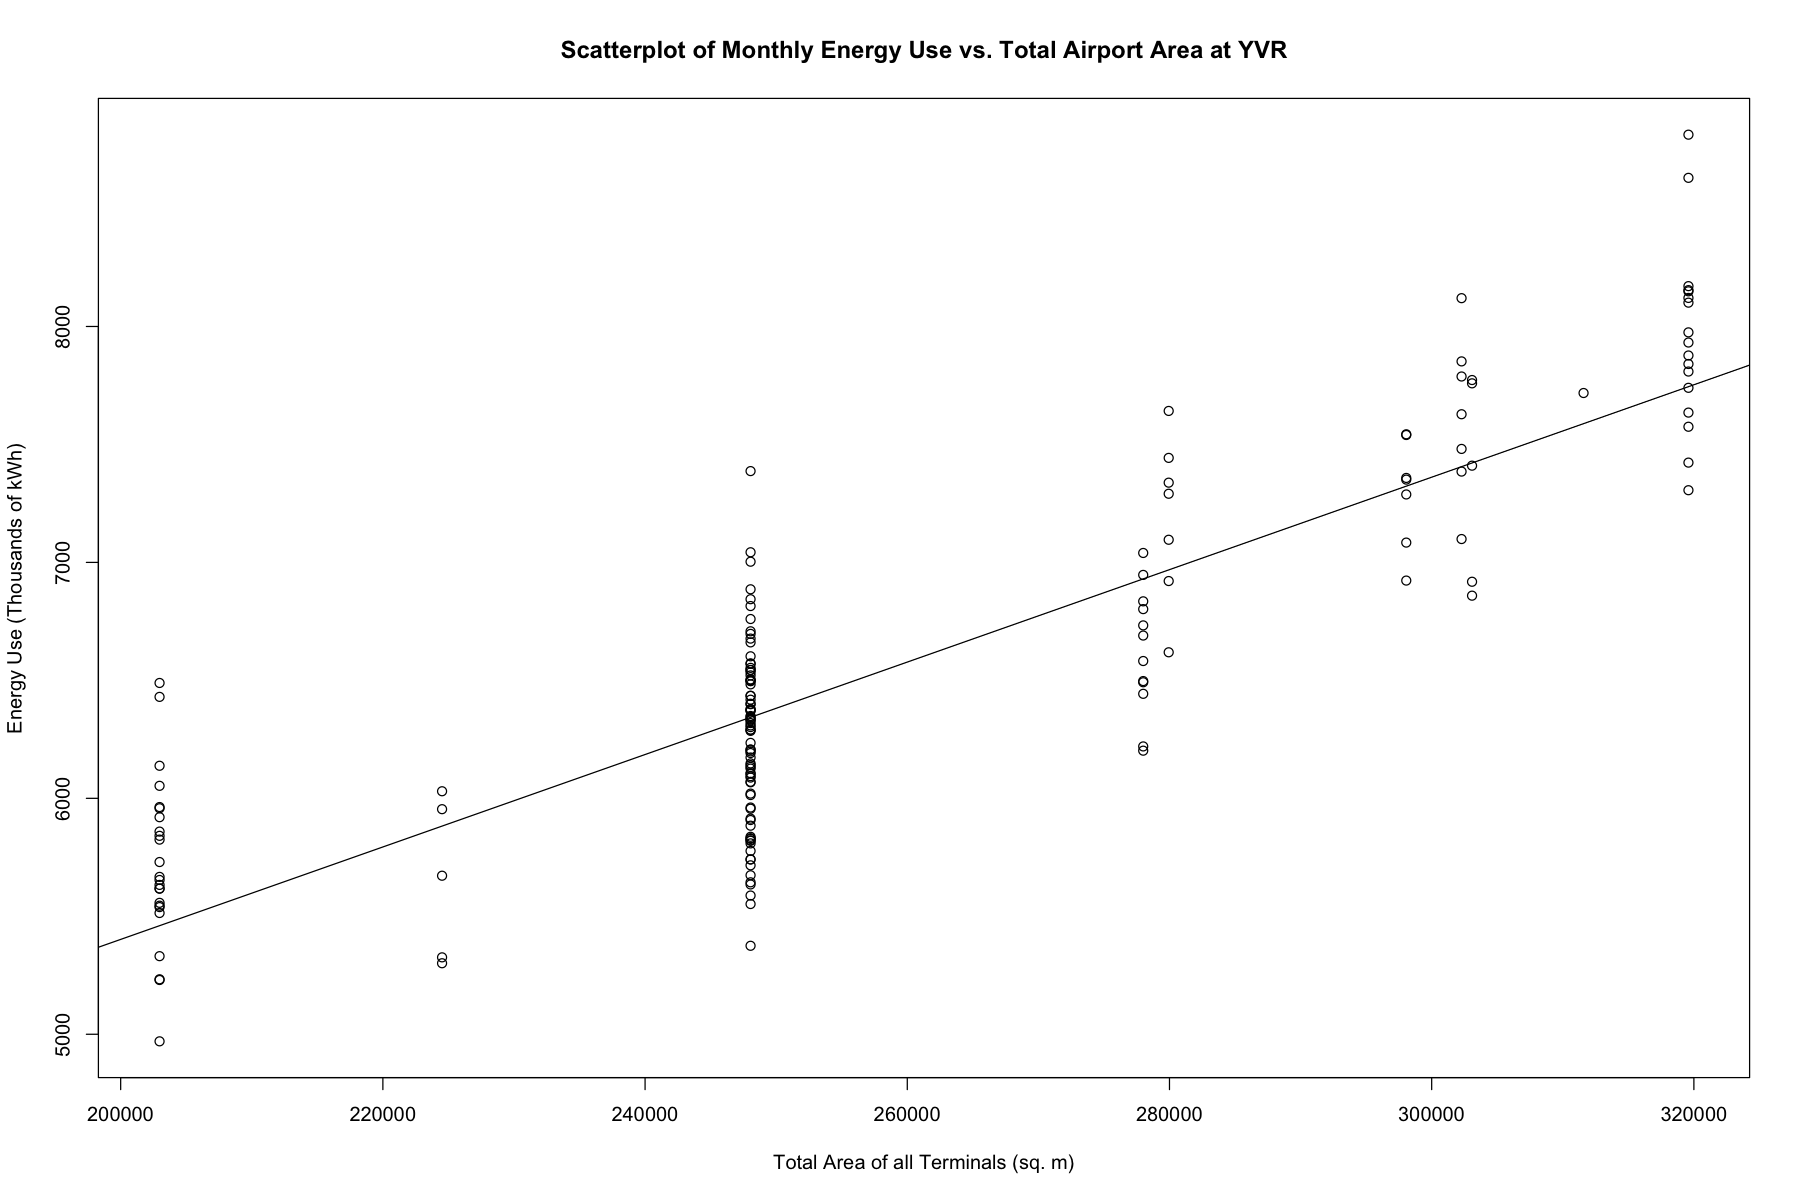

In [744]:
plot(yvr$total.area, yvr$energy, xlab="Total Area of all Terminals (sq. m)", ylab="Energy Use (Thousands of kWh)", main="Scatterplot of Monthly Energy Use vs. Total Airport Area at YVR")
abline(lm(yvr$energy~yvr$total.area))

#### From the timeseries plot, we observe an increasing and then decreasing trend in the monthly energy use at YVR from the years 1998 to 2004, after which the trend is increasing in a wavy pattern until 2010. From the seasonal plot, we can identify year 1999 and 2009 showing inconsistent pattern as compared to the rest of the years. The potential causes for this could be:
#### Global Warming: The change in climate has led to major changes in energy usage over the years where the summers have become hotter, and the winter have become colder. This led to an increase in the use of air conditioners and heating systems resulting in the increased trend of monthly energy use at YVR over time.
#### Increase in number of passengers and lower fare flights: Flying is the most efficient method to save time for travelling. The original data shows that domestic passengers flying in and out of YVR has increased and from this we can infer that more passengers have opted to fly instead of driving or using any other modes of transport when travelling coast to coast or over longer distances. The number of international and U.S. passengers has relatively stayed constant as flying has always been the most efficient method for travelling internationally. Additionally, introduction of air mile programs and cheaper flights has also led to an increase in demand for air travel. Passengers prefer to fly when it saves them both cost and time, and this directly impacts the airport.
#### Increase in the Airport Area: From the data file, we can observe that the total area of YVR has increased over time which could lead to the increase in monthly energy use as more area requires more amenities.

----

<div class="alert alert-block alert-success">
<a id="Basic"></a>

# Basic forecasting methods
</div>  

Use the basic methods we have learned to develop forecasts for the test set. Plot in the following colours:  

mean method (blue)  
drift method (green)  
naïve method (red)  
seasonal naïve method (purple)  

 
## Visual comparison and assessment of basic methods (1.25 marks)

Plot the training set and test set data in black. Include the forecasts of the test set for each of the basic forecasting methods in a different colour (colours are given above) with a legend to explain.  

Prepare the plot for publication and upload it.

 

From a visual assessment, which of the basic forecasting methods seems to produce the best forecasts of the test set? Discuss briefly. (4 sentences max.)  
    

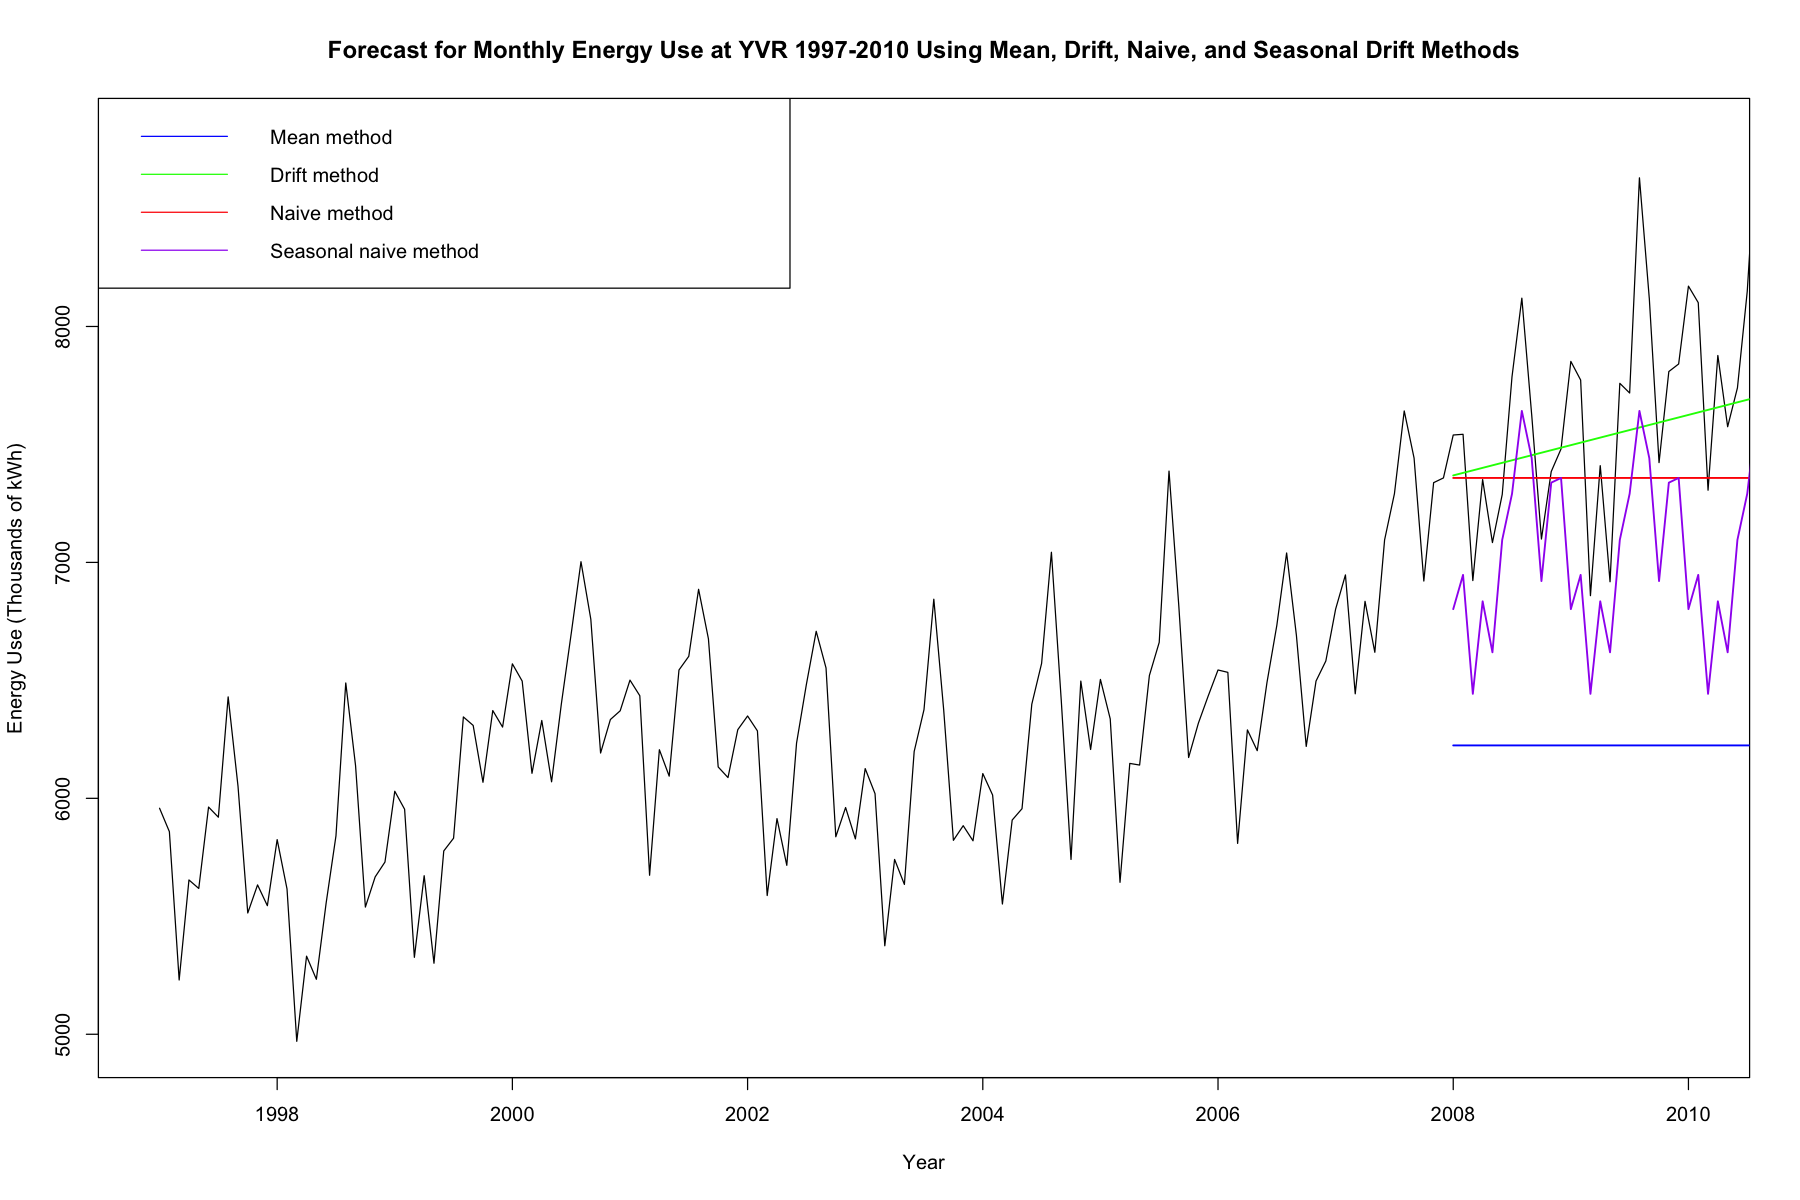

In [745]:
energyts.mean <- meanf(energyts.training, h=36)
energyts.drift <- rwf(energyts.training, h=36, drift=TRUE)
energyts.naive <- naive(energyts.training, h=36)
energyts.snaive <- snaive(energyts.training, h=36)

plot(energyts, main="Forecast for Monthly Energy Use at YVR 1997-2010 Using Mean, Drift, Naive, and Seasonal Drift Methods", ylab = "Energy Use (Thousands of kWh)", xlab = "Year", xlim=c(1997, 2010))
lines(energyts.mean$mean,col="blue", lwd=1.5)
lines(energyts.drift$mean,col="green", lwd=1.5)
lines(energyts.naive$mean,col="red", lwd=1.5)
lines(energyts.snaive$mean,col="purple", lwd=1.5)
legend("topleft",lty=1,col=c("blue", "green", "red", "purple"), 
       legend=c("Mean method","Drift method", "Naive method", "Seasonal naive method"))

#### From the graph we can infer that the Drift method is producing the best forecast among all other methods for the test set. The drift method displays an increasing trend consistent with the trend of the monthly energy use data. Although the drift method does not foreacast seasonality, we can observe that the forecast line produced using the drift method captures the maximum points in the test data set with respect to the increasing trend. In comparision to the Naive method, which also captures data points, it mainly captures only certain points and fails to forecast any trend or seasonality.

## Accuracy measures (1 mark)
Create a table with the RMSE, MAE, MAPE, and MASE for the test set for each of the four basic methods. Round values to 1 decimal place.

In [746]:
method <- c("Mean method","Drift method", "Naive method", "Seasonal naive method")
cbind(method, rbind(round(accuracy(energyts.mean, energyts.test), 1)[2,c(2,3,5,6)],
      round(accuracy(energyts.drift, energyts.test), 1)[2,c(2,3,5,6)],
      round(accuracy(energyts.naive, energyts.test), 1)[2,c(2,3,5,6)],
      round(accuracy(energyts.snaive, energyts.test), 1)[2,c(2,3,5,6)]))

method                RMSE   MAE    MAPE MASE
[1,] Mean method           1528.5 1463.8 18.8 5.5 
[2,] Drift method          416    328.5  4.2  1.2 
[3,] Naive method          550.1  443.2  5.6  1.7 
[4,] Seasonal naive method 698.7  626.8  8    2.4

## Comparison of basic methods (1 mark)
Based on the accuracy measures for the test set, which of the basic forecasting methods seems to forecast the test set the best? Interpret the MASE for this method. (4 sentences max.) 

#### After calculating the accuracy measures for Mean, Drift, Naive and Seasonal Naive methods, we can infer that the drift method is the best for forecasting the test set. For Drift method, RMSE is 416, MAE is 328.5 and MASE is 1.2 which is the lowest values out of all our basic forecasting methods.  Although Mean Absolute Scaled Error (MASE) for the drift method is lowest amongst all others indicating that the model is more accuarate and has smaller error relative to other models, a value of over 1 indicates the model needs a lot of improvement. A value of 1 implies that the model is as good as just picking the last observation so we want our model to be ateast less than 1 and the lower the better

----

<div class="alert alert-block alert-success">
<a id="ETS"></a>

# Exponential Smoothing (ETS) model

Fit ETS models to the training set. Find your best model and present it here. Include any other models you tried in **Appendix A**.
    
</div>    

## What is the model, using the ETS(__, __, __) notation? (0.25 marks)

#### We are using ETS(M,A,A) model.

In [747]:
energyts.finalets <- ets(energyts.training, model="MAA")

## What are the estimates of the smoothing parameters? (0.25 marks)

#### The estimates for the smoothing parameters are: alpha = 0.8082, beta = 0.0001, gamma = 0.0001

In [748]:
summary(energyts.finalets)

ETS(M,A,A) 

Call:
 ets(y = energyts.training, model = "MAA") 

  Smoothing parameters:
    alpha = 0.8082 
    beta  = 1e-04 
    gamma = 1e-04 

  Initial states:
    l = 5803.689 
    b = 17.436 
    s = -37.9185 -34.4259 -248.9098 320.0811 666.5463 231.972
           63.7197 -351.3296 -188.4109 -568.7838 53.8096 93.6498

  sigma:  0.0218

     AIC     AICc      BIC 
1957.628 1962.996 2006.636 

Training set error measures:
                    ME     RMSE     MAE        MPE     MAPE      MASE
Training set -6.611667 126.3696 99.4423 -0.1458104 1.602955 0.3752775
                    ACF1
Training set -0.02754951

## Explain why this model is appropriate based on the features of the data. (4 sentences max.) (1.5 marks)

#### As we can infer from the STL decomposition of the monthly energy use at YVR, there are remainders only in the beginning and at the end of the time series indicating an exponential decrease in the beginning and an exponential increase towards the end. This shows that the errors are multiplicative. The trend displays an approximate linear pattern and the seasonality has an almost equal variance indicating that they should both be additive in ETS model. Since the trend is already portraying a flat linear pattern, we do not need to dampen it and this leads us to ETS(M,A,A).

## Model plot (0.75 marks)

Create a time plot of the data in black with a gap between the training set and test set data.

Show the fitted values of the model graphed in blue. Show the forecasts for the test set with a bold blue line and the 80% and 95% prediction intervals as shaded regions.

Prepare this plot for publication and upload it.

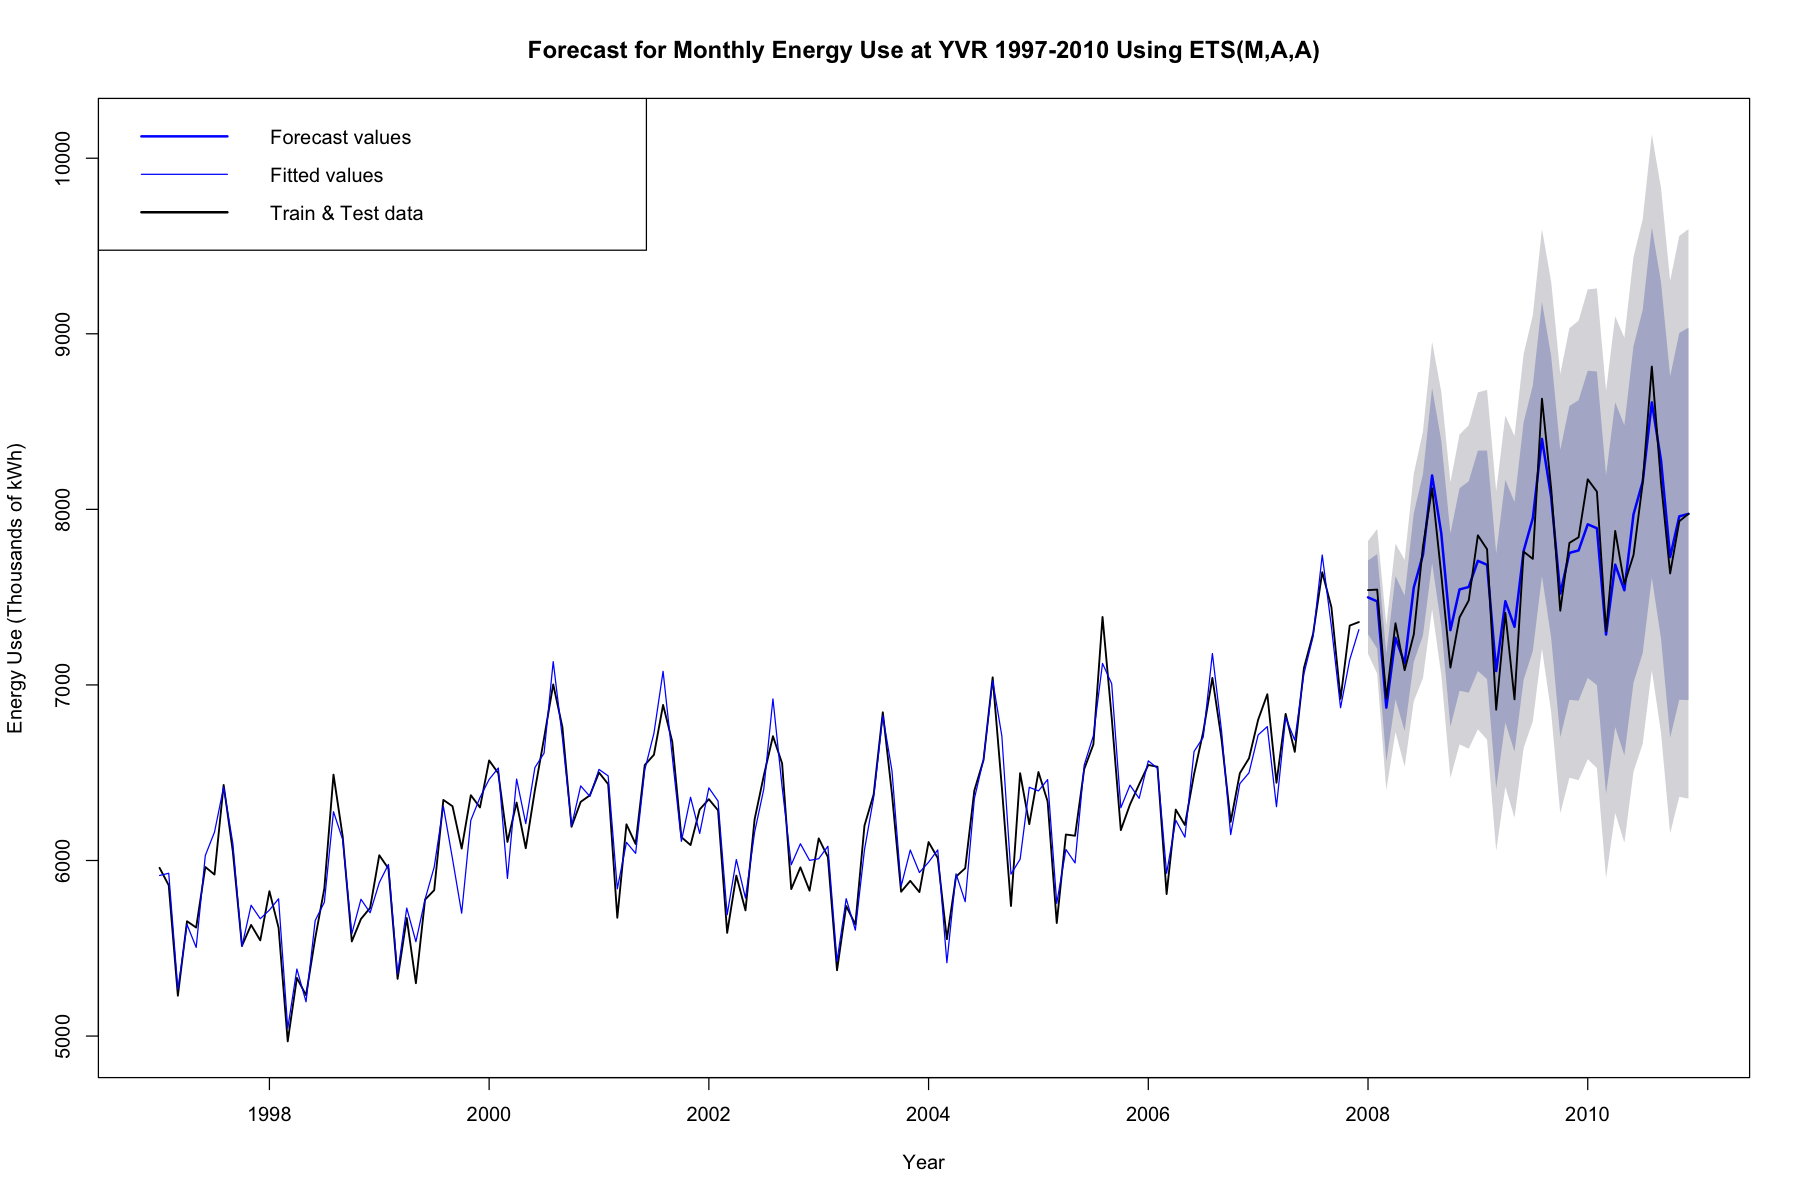

In [749]:
plot(forecast(energyts.finalets, 36), main="Forecast for Monthly Energy Use at YVR 1997-2010 Using ETS(M,A,A)", ylab="Energy Use (Thousands of kWh)", xlab="Year", lwd = 1.5, fcol = 'blue')
lines(fitted(energyts.finalets), col = "blue")
lines(energyts.test, lwd = 1.5)
legend("topleft",lty=1,lwd = 2:1, col=c("blue", "blue", "black"), 
       legend=c("Forecast values","Fitted values", "Train & Test data"))

## Goodness of fit (1 mark)

Quantify and discuss the goodness of fit of the model to the training set. You can compare this model to other ETS models that you tried. (Present any values, then 4 sentences max.)

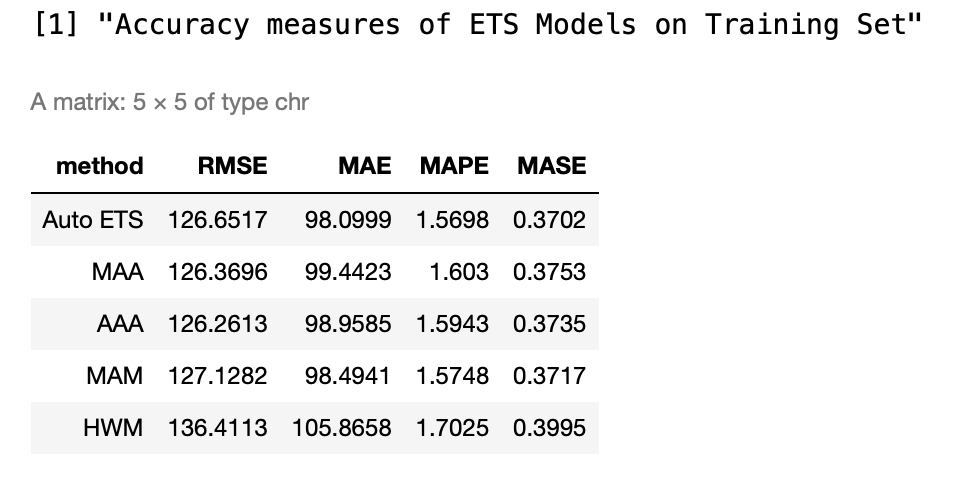

#### We are using several ETS models such as Auto ETS, ETS(M,A,A), ETS(A,A,A), ETS(M,A,M), Holt-Winters Multiplicative method to measure the goodness of fit to the training set. The RMSE is lowest for the ETS(A,A,A) at 126.2613, the MAE is lowest for Auto ETS model at 98.0999, the MAPE is lowest for Auto ETS at 1.5698, and the MASE is lowest for Auto ETS model at 0.3702 (more information on these measures can be found in the appendix). Although these measures might indicate that ETS(A,N,A) derived from the Auto ETS method is the best, the measures are very similar across all models. It is more appropriate to observe measures from a test set perspective to determine which model will most accurately forecast the data, thus we should dive deeper and calculate the accuracy measures on the test set to quantify the goodness of fit.

## Accuracy measures (1 mark)
Calculate the accuracy measures (RMSE, MAE, MAPE, MASE) to show how well the model forecasts for the test set.

In [750]:
method <- c("ETS(M,A,A)")
cbind(method, rbind(
      round(accuracy(forecast(energyts.finalets, 36), energyts.test),4)[2,c(2,3,5,6)]))

method     RMSE     MAE      MAPE  MASE  
[1,] ETS(M,A,A) 155.9826 123.1789 1.614 0.4649

## Accuracy of forecasts (1 mark)
Discuss how well this model forecasts the test set based on any plots or values that you calculated in previous questions. Remember that you can compare it to the basic methods. (4 sentences max.)

#### After calculating the test accuracy measures for the ETS(M,A,A) model we can infer that they are lower than the test accuracy measures for the basic method models. The RMSE for ETS(M,A,A) is 155.9826, MAE is 123.1789 and MASE is 0.4649; an MASE less than 1 indicates that the model is forecasting better than just picking the last value. We can infer from the plot that the forecasts from this model captures the trend and seasonality of the test set while also capturing values from the original data. 

## Residual diagnostics (3.5 marks)

a) Calculate the mean of the residuals. Does this value indicate bias? (0.5 marks)  
b) Use the checkresiduals() function. Which properties of residuals have been met or not met according to these plots? (2 marks)  
c) Interpret the results of a portmanteau test for autocorrelations. Clearly state the hypotheses, the number of lags tested, the test statistic, p-value, decision, and concluding sentence. (1 mark)  

In [751]:
res1 <- residuals(energyts.finalets)
mean.res1 <- mean(res1, na.rm=TRUE); round(mean.res1,4)

[1] -0.001


	Ljung-Box test

data:  Residuals from ETS(M,A,A)
Q* = 12.469, df = 8, p-value = 0.1315

Model df: 16.   Total lags used: 24



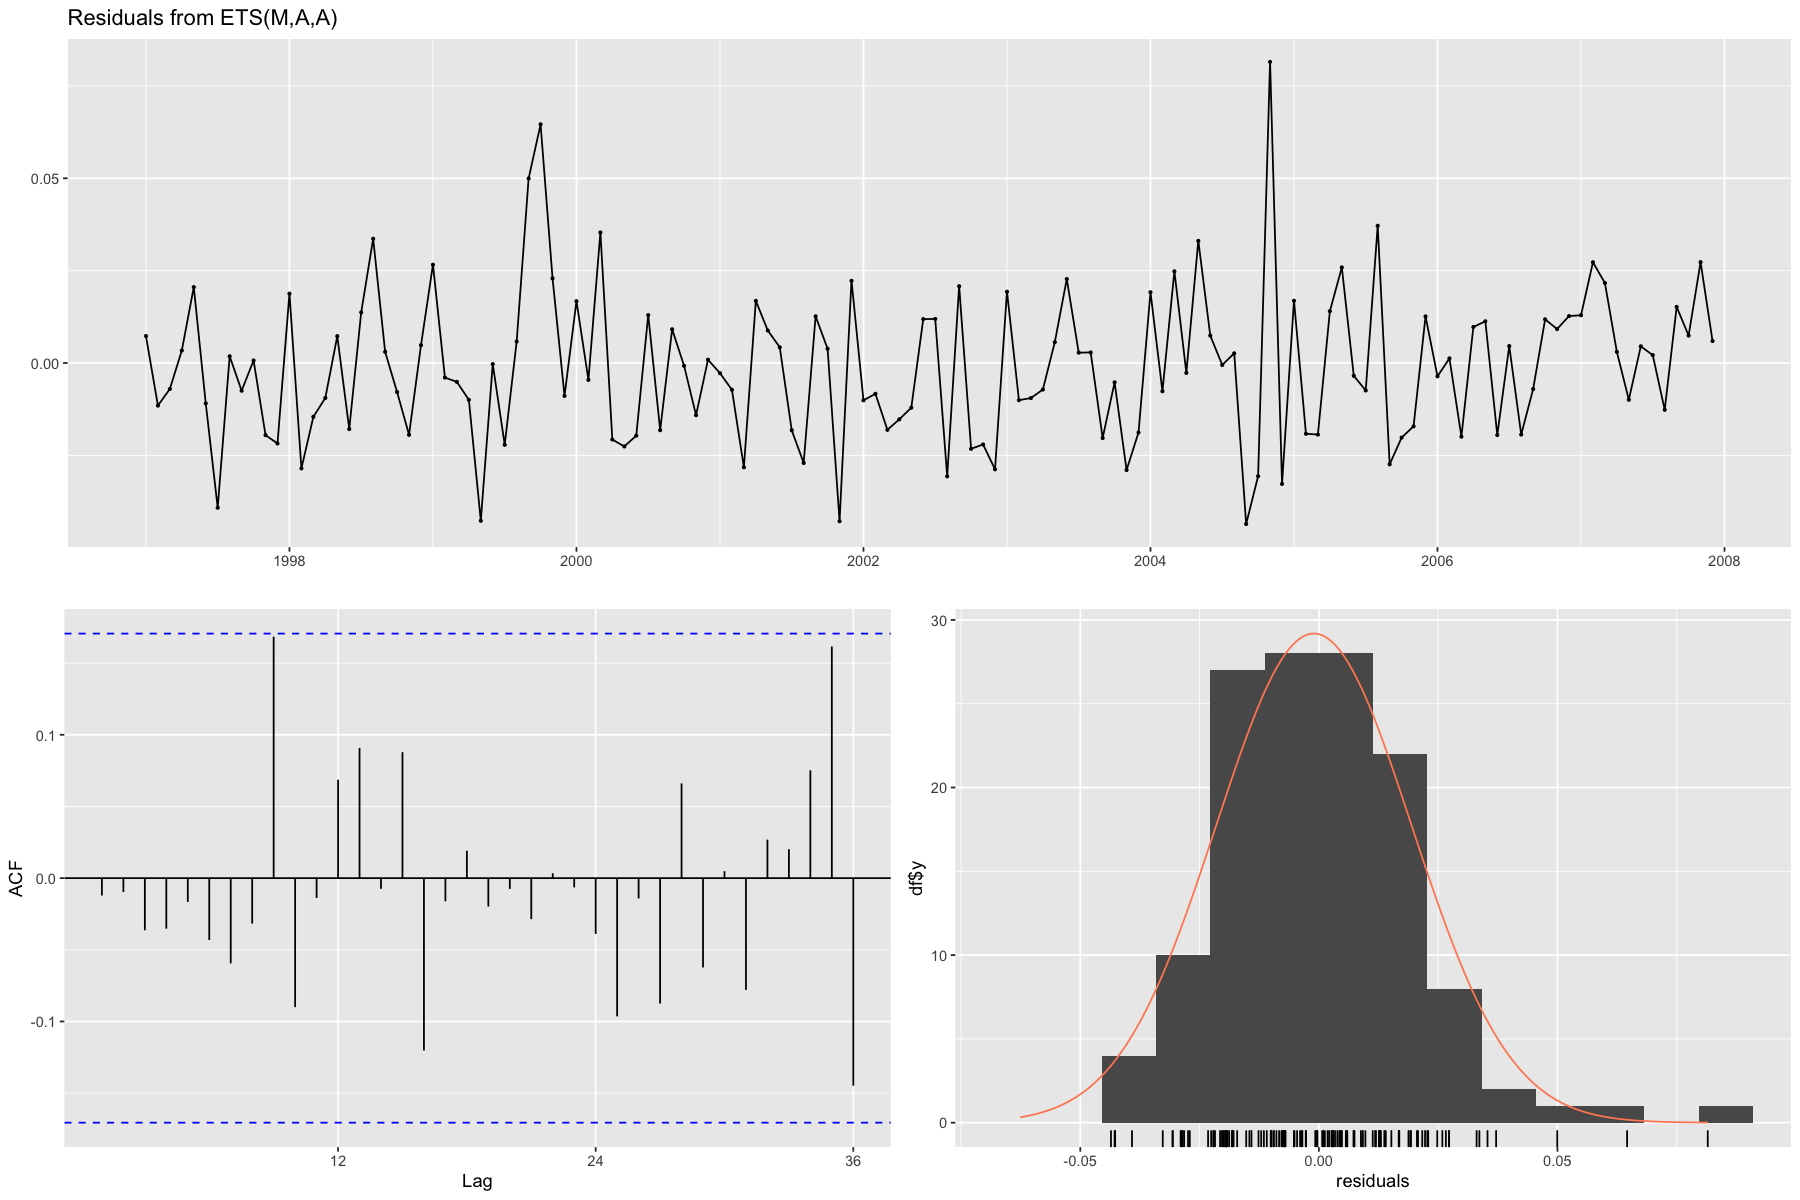

In [752]:
checkresiduals(energyts.finalets)

In [753]:
Box.test(res1, type="Ljung", lag=36, fitdf=16)


	Box-Ljung test

data:  res1
X-squared = 27.654, df = 20, p-value = 0.1179


#### The mean of the residuals is -0.001 which a value close to 0 and indicates there is almost no bias in the model. 

#### The relationship of the residuals as seen in the time plot is linear. The mean of the residuals is very close to 0, the residuals are not autocorrelated as seen by the fact that no lag crosses the blue lines in the ACF plot, the histogram shows that the residuals are normally distributed, and the residuals have a constant variance as observed in the time series plot of the residuals. To conclude, all properties of residuals have been met. 

#### The portmanteau test hypothesis are:
#### H0: The first 36 autocorrelations are not significantly different from a white noise process 
#### Ha: The first 36 autocorrelations are significantly different from a white noise process 

#### The test uses 36 lags and the test statistic value is 27.654. The p-value is 0.1179.
#### Using alpha = 0.05, we fail to reject the null hypothesis (H0).

#### Since our p-value is more than the alpha, we fail to reject the null hypothesis which implies that there are no significant autocorrelations for the first 36 lags of the residuals

----

<div class="alert alert-block alert-success">
<a id="ARIMA"></a>
    
# ARIMA model
    
Fit ARIMA models to the training set. Find your best model and present it here. Include any other models you tried in **Appendix B**.
    
</div>    

## What is the model, using the ARIMA(p, d, q)X(P, D, Q)m notation? (0.25 marks)

#### We are using ARIMA(0,1,1)X(0,1,1)12 model derived from Auto ARIMA using CSS Method.

In [754]:
energyts.arimafinal <- auto.arima(energyts.training , method = "CSS")

## What are the estimates of the parameters? (0.25 marks)

#### The estimates for the smoothing parameters are: ma1 = -0.1992, sma1 = -0.8106

In [755]:
summary(energyts.arimafinal)

Series: energyts.training 
ARIMA(0,1,1)(0,1,1)[12] 

Coefficients:
          ma1     sma1
      -0.1992  -0.8106
s.e.   0.0906   0.0656

sigma^2 = 21514:  log likelihood = -761.44

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 17.15982 138.0902 99.44907 0.2387605 1.582683 0.3753031
                    ACF1
Training set -0.01576781

## Appropriateness of model (2 marks)
Explain why this model is appropriate based on the features of the data. Include the ACF and PACF plots of the differenced data. (5 sentences max.)

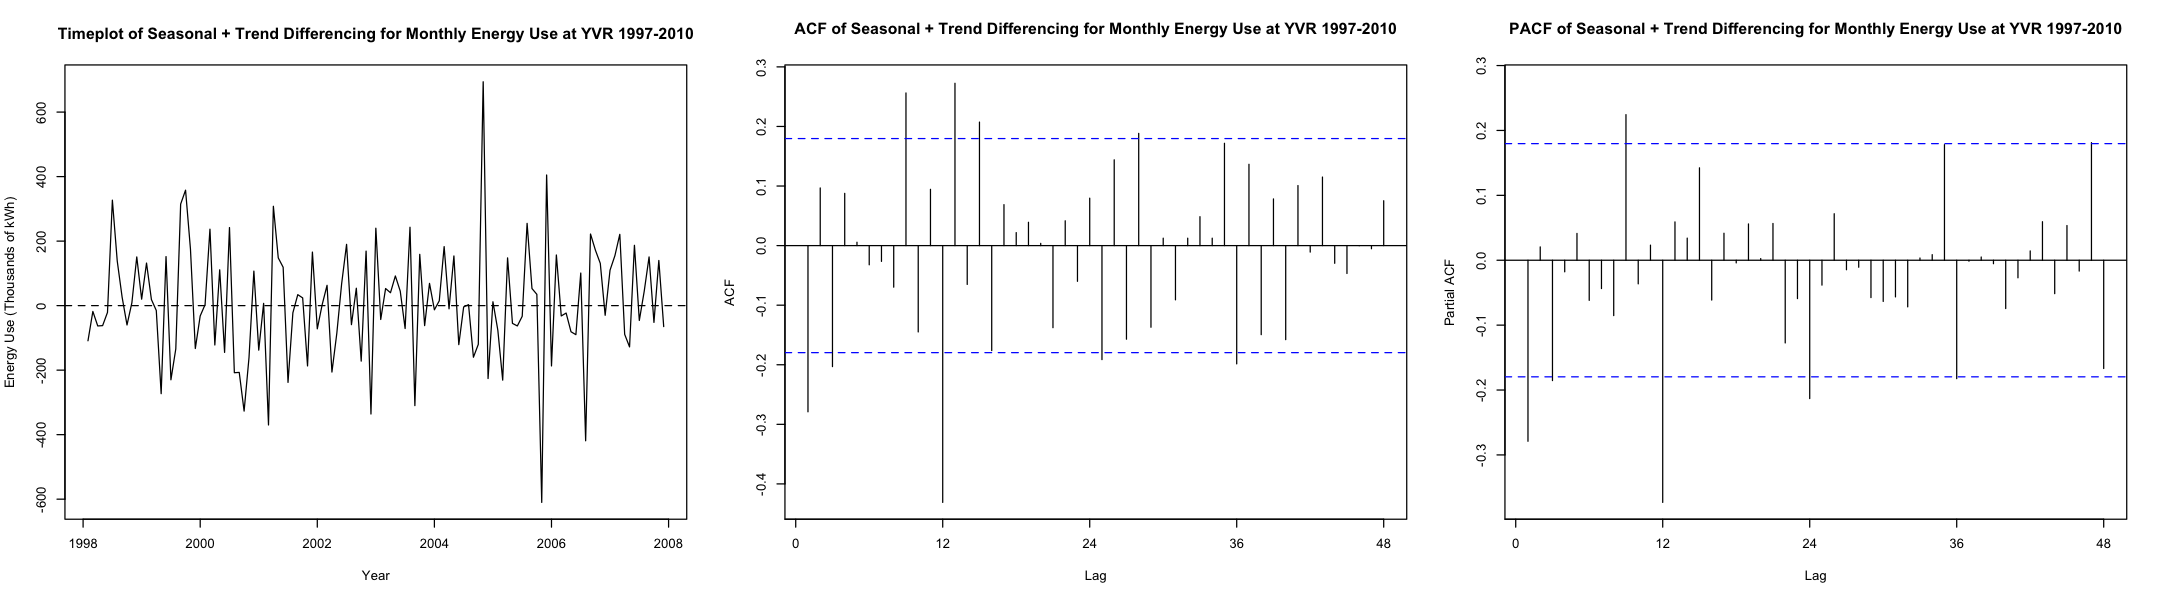

In [756]:
options(repr.plot.width=18, repr.plot.height=5)
par(mfrow=c(1,3))

plot(diff(diff(energyts.training, lag=12)), xlab = "Year", ylab = "Energy Use (Thousands of kWh)", main = "Timeplot of Seasonal + Trend Differencing for Monthly Energy Use at YVR 1997-2010"); abline(0,0, lty=2)
Acf(diff(diff(energyts.training, lag=12)), lag=48, main = "ACF of Seasonal + Trend Differencing for Monthly Energy Use at YVR 1997-2010")
Pacf(diff(diff(energyts.training, lag=12)), lag=48, main = "PACF of Seasonal + Trend Differencing for Monthly Energy Use at YVR 1997-2010")

#### We get constant variance and simple ACF and PACF plots of the monthly energy use at YVR after one seasonal differencing and one trend differencing. Since the first lag is negative it is inappropriate to further difference the data. With the ACF and PACF plot having similar number of significant autocorrelations, we use the ACF plot to determine the Moving Average (MA) component of the ARIMA model. There is 1 significant autocorrelation for the seasonal lags before the autocorrelation drops and there is 1 significant autocorrelation for the non-seasonal lags before the autocorrelation drops. With seasonal frequency as 12, we arrive at ARIMA(0,1,1)X(0,1,1)12.

## Model plot (0.75 marks)

Create a time plot of the data in black with a gap between the training set and test set data.

Show the fitted values of the model graphed in blue. Show the forecasts for the test set with a bold blue line and the 80% and 95% prediction intervals as shaded regions.

Prepare this plot for publication and upload it.

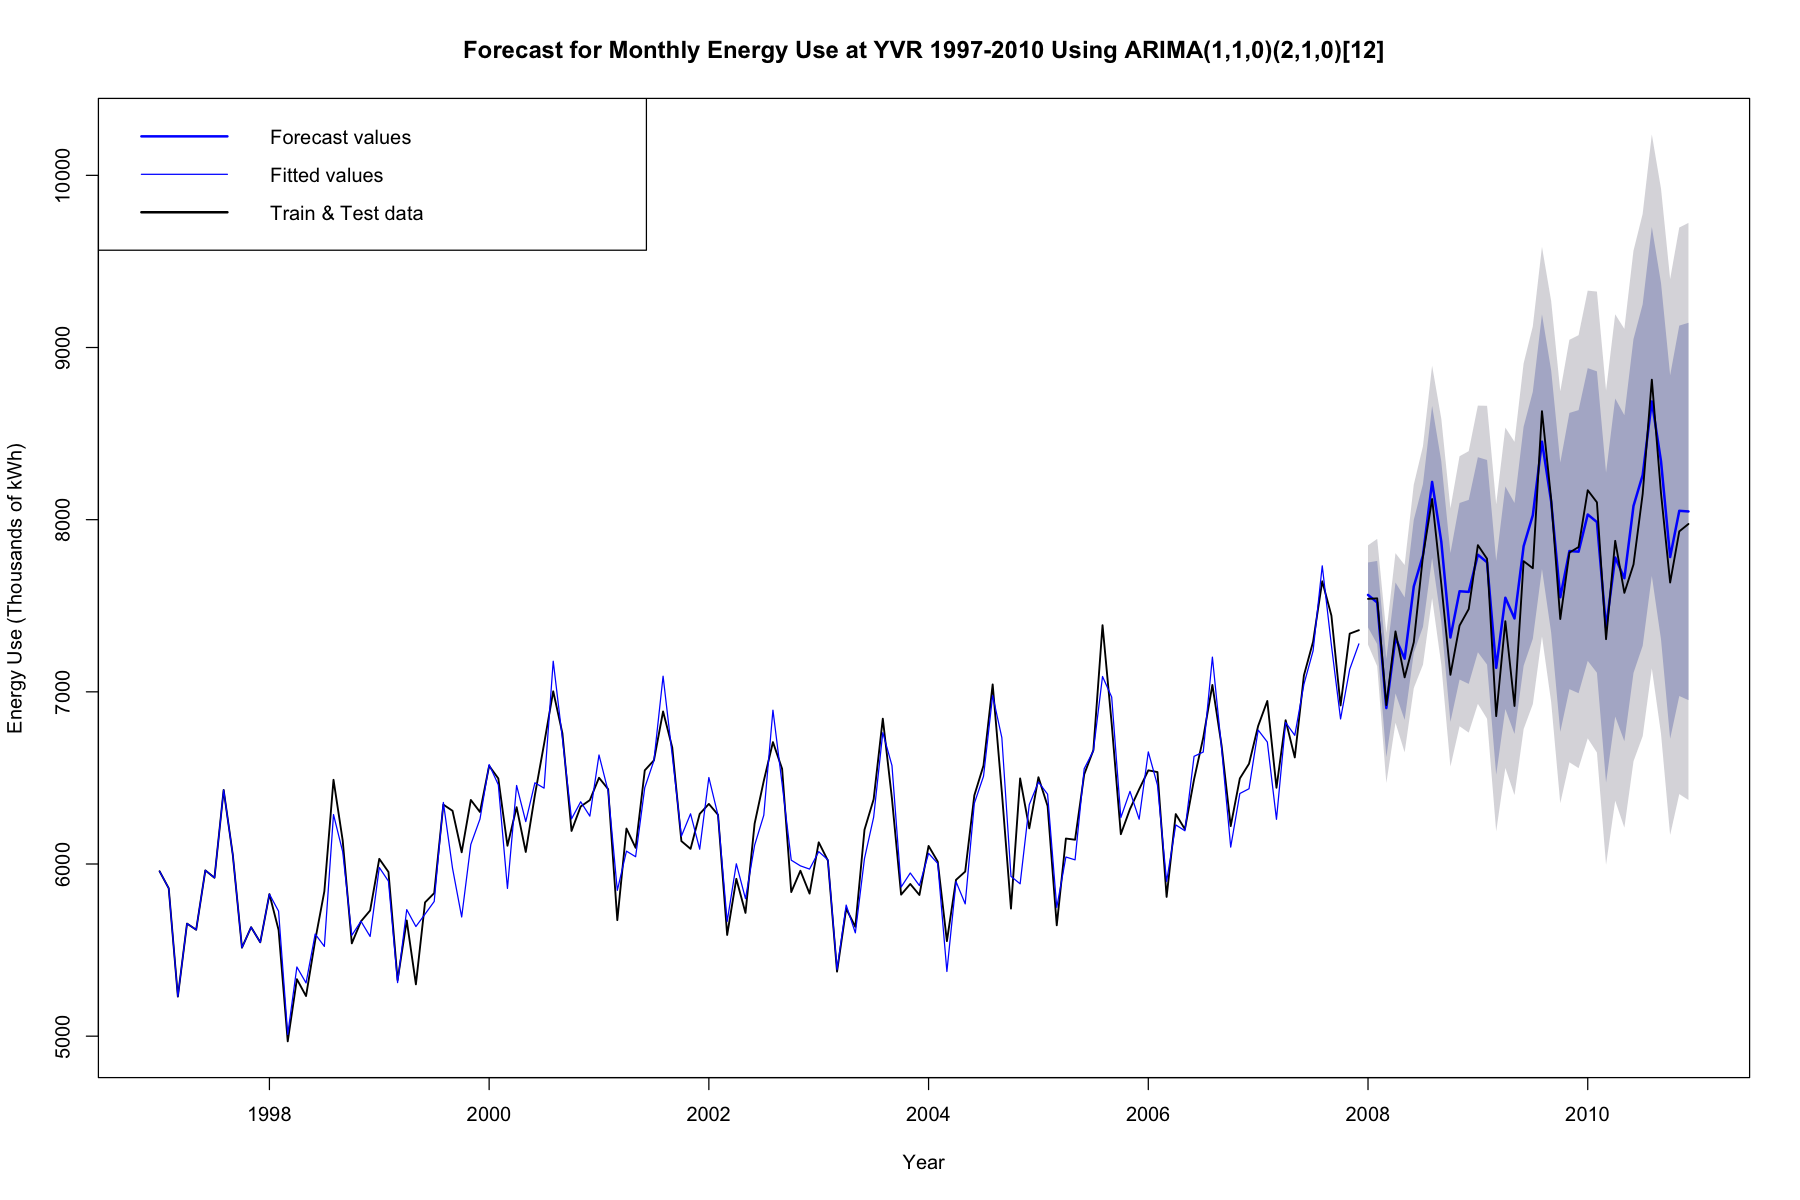

In [757]:
options(repr.plot.width=15, repr.plot.height=10)
plot(forecast(energyts.arimafinal, 36), main="Forecast for Monthly Energy Use at YVR 1997-2010 Using ARIMA(1,1,0)(2,1,0)[12]", ylab="Energy Use (Thousands of kWh)", xlab="Year", lwd = 1.5, fcol = 'blue')
lines(fitted(energyts.arimafinal), col = "blue")
lines(energyts.test, lwd = 1.5)
legend("topleft",lty=1,lwd = 2:1, col=c("blue", "blue", "black"), 
       legend=c("Forecast values","Fitted values", "Train & Test data"))

## Goodness of fit (1 mark)

Quantify and discuss the goodness of fit of the model to the training set. You can compare this model to other ARIMA models that you tried. (Present any values, then 4 sentences max.)

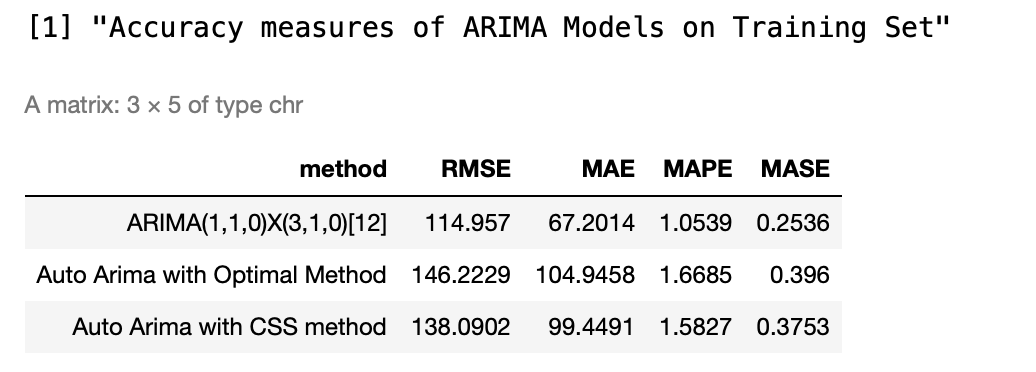

#### We are using several ARIMA models such as ARIMA(1,1,0)X(3,1,0)12 using CSS method, Auto ARIMA using optimal method and then CSS method to measure the goodness of fit to the training set. The RMSE is lowest for the ARIMA(1,1,0)X(3,1,0)12 at 114.957, the MAE is lowest for ARIMA(1,1,0)X(3,1,0)12 model at 67.2014, the MAPE is lowest for ARIMA(1,1,0)X(3,1,0)12 at 1.0539, and the MASE is lowest for ARIMA(1,1,0)X(3,1,0)12 model at 0.2536 (more information on these measures can be found in the appendix). Although these measures might indicate that ARIMA(1,1,0)X(3,1,0)12 derived from the CSS method is the best, it could mean that the model is overfit to the training data and hence, it produces the lowest accuracy measures. It is more appropriate to observe measures from a test set perspective to determine which model will most accurately forecast the data, thus we should dive deeper and calculate the accuracy measures on the test set to quantify the goodness of fit.

## Accuracy measures (1 mark)
Calculate the accuracy measures (RMSE, MAE, MAPE, MASE) to show how well the model forecasts for the test set.

In [758]:
method <- c("ARIMA(0,1,1)X(0,1,1)[12]")
cbind(method, rbind(
      round(accuracy(forecast(energyts.arimafinal, 36), energyts.test),4)[2,c(2,3,5,6)]))

method                   RMSE     MAE      MAPE   MASE  
[1,] ARIMA(0,1,1)X(0,1,1)[12] 172.4477 132.1323 1.7479 0.4986

## Accuracy of forecasts (1 mark)
Discuss how well this model forecasts the test set based on any plots or values that you calculated in previous questions. Remember that you can compare it to the basic methods. (4 sentences max.)

#### After calculating the test accuracy measures for the ARIMA(0,1,1)X(0,1,1)12 model derived from auto ARIMA using CSS method we can infer that they are lower than the test accuracy measures for the other method models. The RMSE for ARIMA(0,1,1)X(0,1,1)12 is 172.447, MAE is 132.1323 and MASE is 0.4986; an MASE less than 1 indicates that the model is forecasting better than just picking the last value. We can infer from the plot that the forecasts from this model displays the trend and seasonality of the test set but does not capture values from the original data. 

## Residual diagnostics (3.5 marks)

a) Calculate the mean of the residuals. Does this value indicate bias? (0.5 marks)  
b) Use the checkresiduals() function. Which properties of residuals have been met or not met according to these plots? (2 marks)  
c) Interpret the results of a portmanteau test for autocorrelations. Clearly state the hypotheses, the number of lags tested, the test statistic, p-value, decision, and concluding sentence. (1 mark)  

In [759]:
res2 <- residuals(energyts.arimafinal)
mean.res2 <- mean(res2, na.rm=TRUE); round(mean.res2,4)

[1] 17.1598


	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)(0,1,1)[12]
Q* = 15.928, df = 22, p-value = 0.8195

Model df: 2.   Total lags used: 24



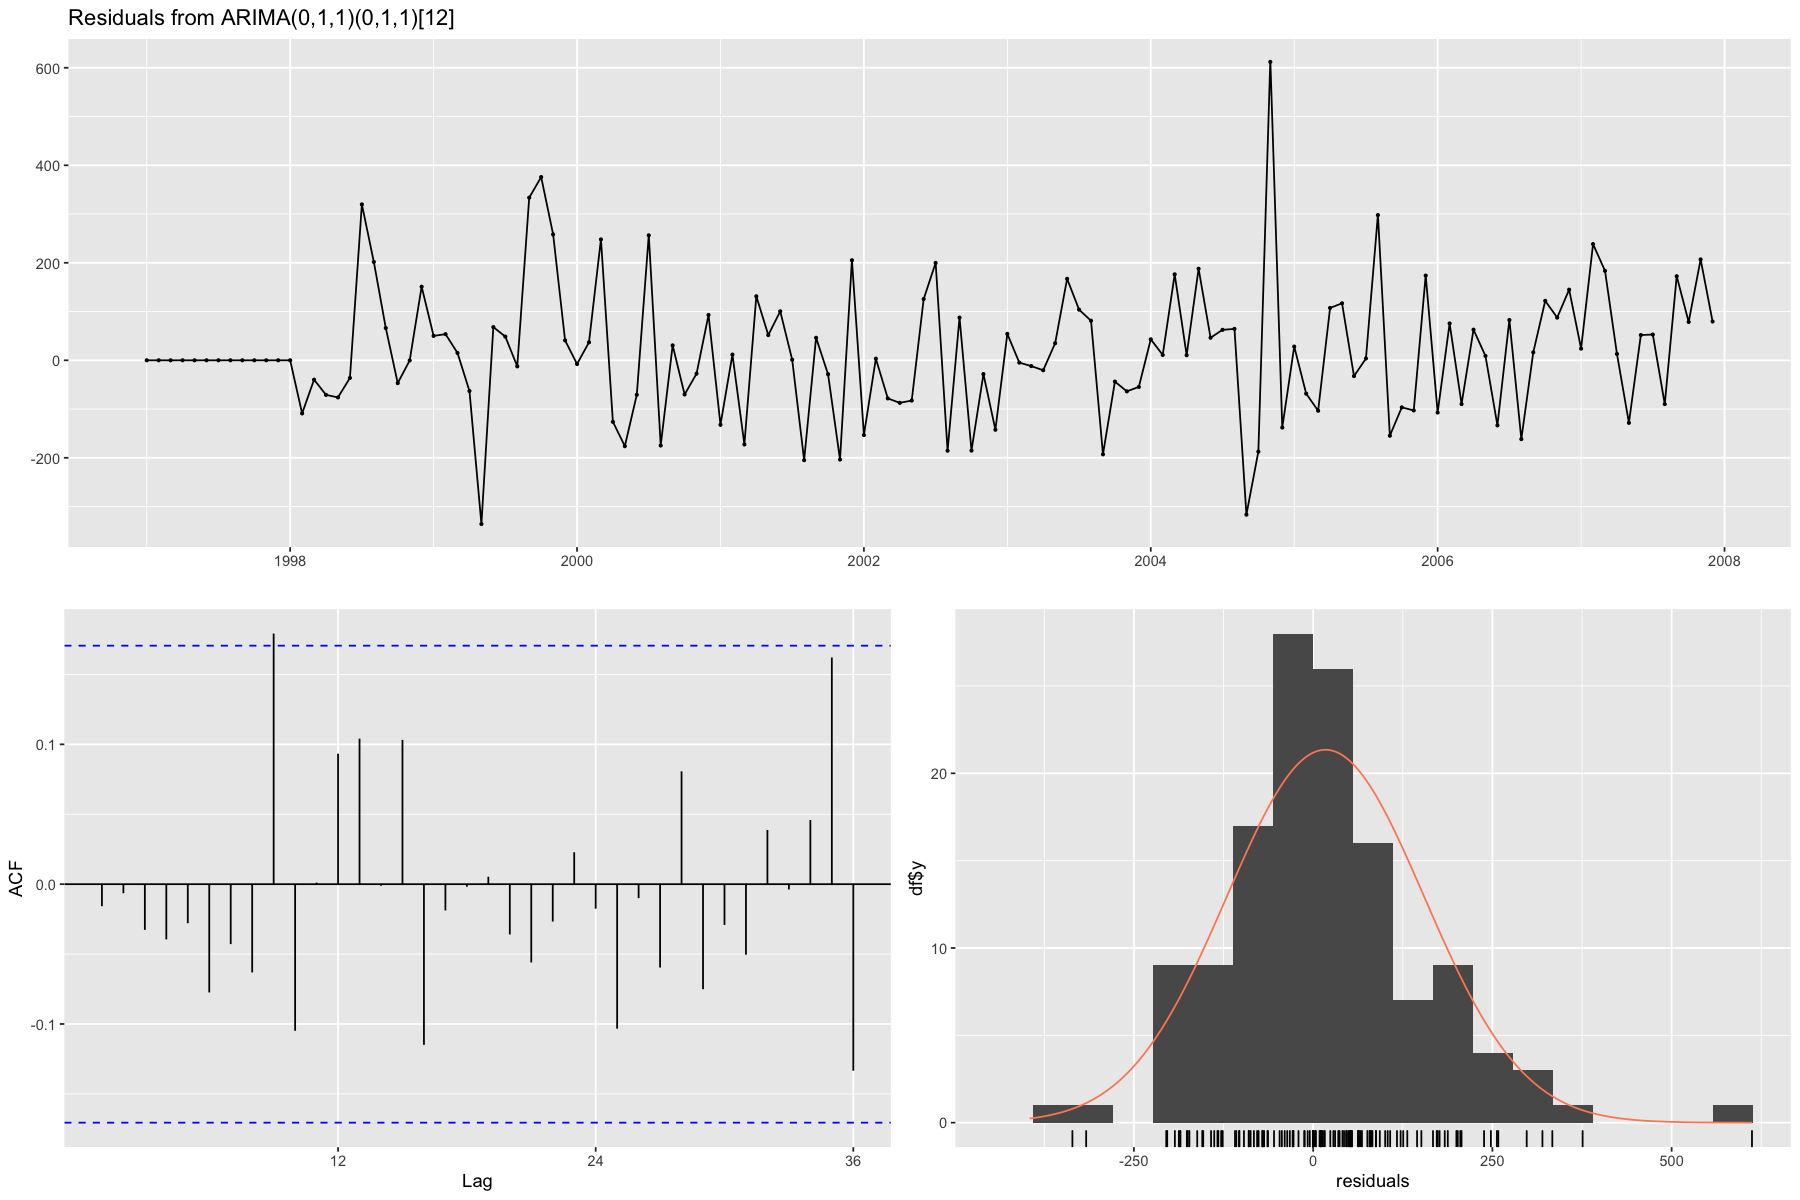

In [760]:
checkresiduals(energyts.arimafinal)

In [761]:
Box.test(res2, type="Ljung", lag = 36, fitdf=2)


	Box-Ljung test

data:  res2
X-squared = 29.7, df = 34, p-value = 0.6784


#### The mean of the residuals is 17.1598 which a value far from 0 and indicates there is bias in the model. 

#### The relationship of the residuals as seen in the time plot is linear. The mean of the residuals is not close to 0, there are 2 lags that are significantly autocorrelated which indicates that the residuals are autocorrelated, the histogram shows that the residuals are normally distributed but shows two outliers, and the residuals do not have a constant variance as observed in the time series plot of the residuals. To conclude, only the relationship is linear and residuals are normally distributed properties are met by the model and there may be scope for improvement.

#### The portmanteau test hypothesis are:
#### H0: The first 36 autocorrelations are not significantly different from a white noise process 
#### Ha: The first 36 autocorrelations are significantly different from a white noise process 

#### The test uses 36 lags and the test statistic value is 29.7. The p-value is 0.6784.
#### Using alpha = 0.05, we fail to reject the null hypothesis (H0).

#### Since our p-value is more than the alpha, we fail to reject the null hypothesis which implies that there are no significant autocorrelations for the first 36 lags of the residuals, although the ACF plot does indicate 2 significant autocorrelations.

----

<div class="alert alert-block alert-warning">
<a id="Comparison"></a>

# Comparison of models (200 words max.) (2 marks)  

Compare your exponential smoothing/ETS model, your ARIMA model, and the basic methods. Which one is your best forecasting method (this will be your final model that is used in the next two sections)? Explain using support from previous questions as well as by creating a plot to compare the forecasts for the test set for the different methods.  
<div>


In [762]:
method <- c("Mean method","Drift method", "Naive method", "Seasonal naive method", "ETS(M,A,A)", "ARIMA(0,1,1)X(0,1,1)[12]")
cbind(method, rbind(round(accuracy(energyts.mean, energyts.test), 4)[2,c(2,3,5,6)],
      round(accuracy(energyts.drift, energyts.test), 4)[2,c(2,3,5,6)],
      round(accuracy(energyts.naive, energyts.test), 4)[2,c(2,3,5,6)],
      round(accuracy(energyts.snaive, energyts.test), 4)[2,c(2,3,5,6)],
      round(accuracy(forecast(energyts.finalets, 36), energyts.test),4)[2,c(2,3,5,6)],
      round(accuracy(forecast(energyts.arimafinal, 36), energyts.test),4)[2,c(2,3,5,6)]))

method                   RMSE      MAE       MAPE    MASE  
[1,] Mean method              1528.4982 1463.7955 18.7756 5.5241
[2,] Drift method             415.979   328.4824  4.2133  1.2396
[3,] Naive method             550.0588  443.1944  5.6035  1.6725
[4,] Seasonal naive method    698.6573  626.8333  8.0386  2.3656
[5,] ETS(M,A,A)               155.9826  123.1789  1.614   0.4649
[6,] ARIMA(0,1,1)X(0,1,1)[12] 172.4477  132.1323  1.7479  0.4986

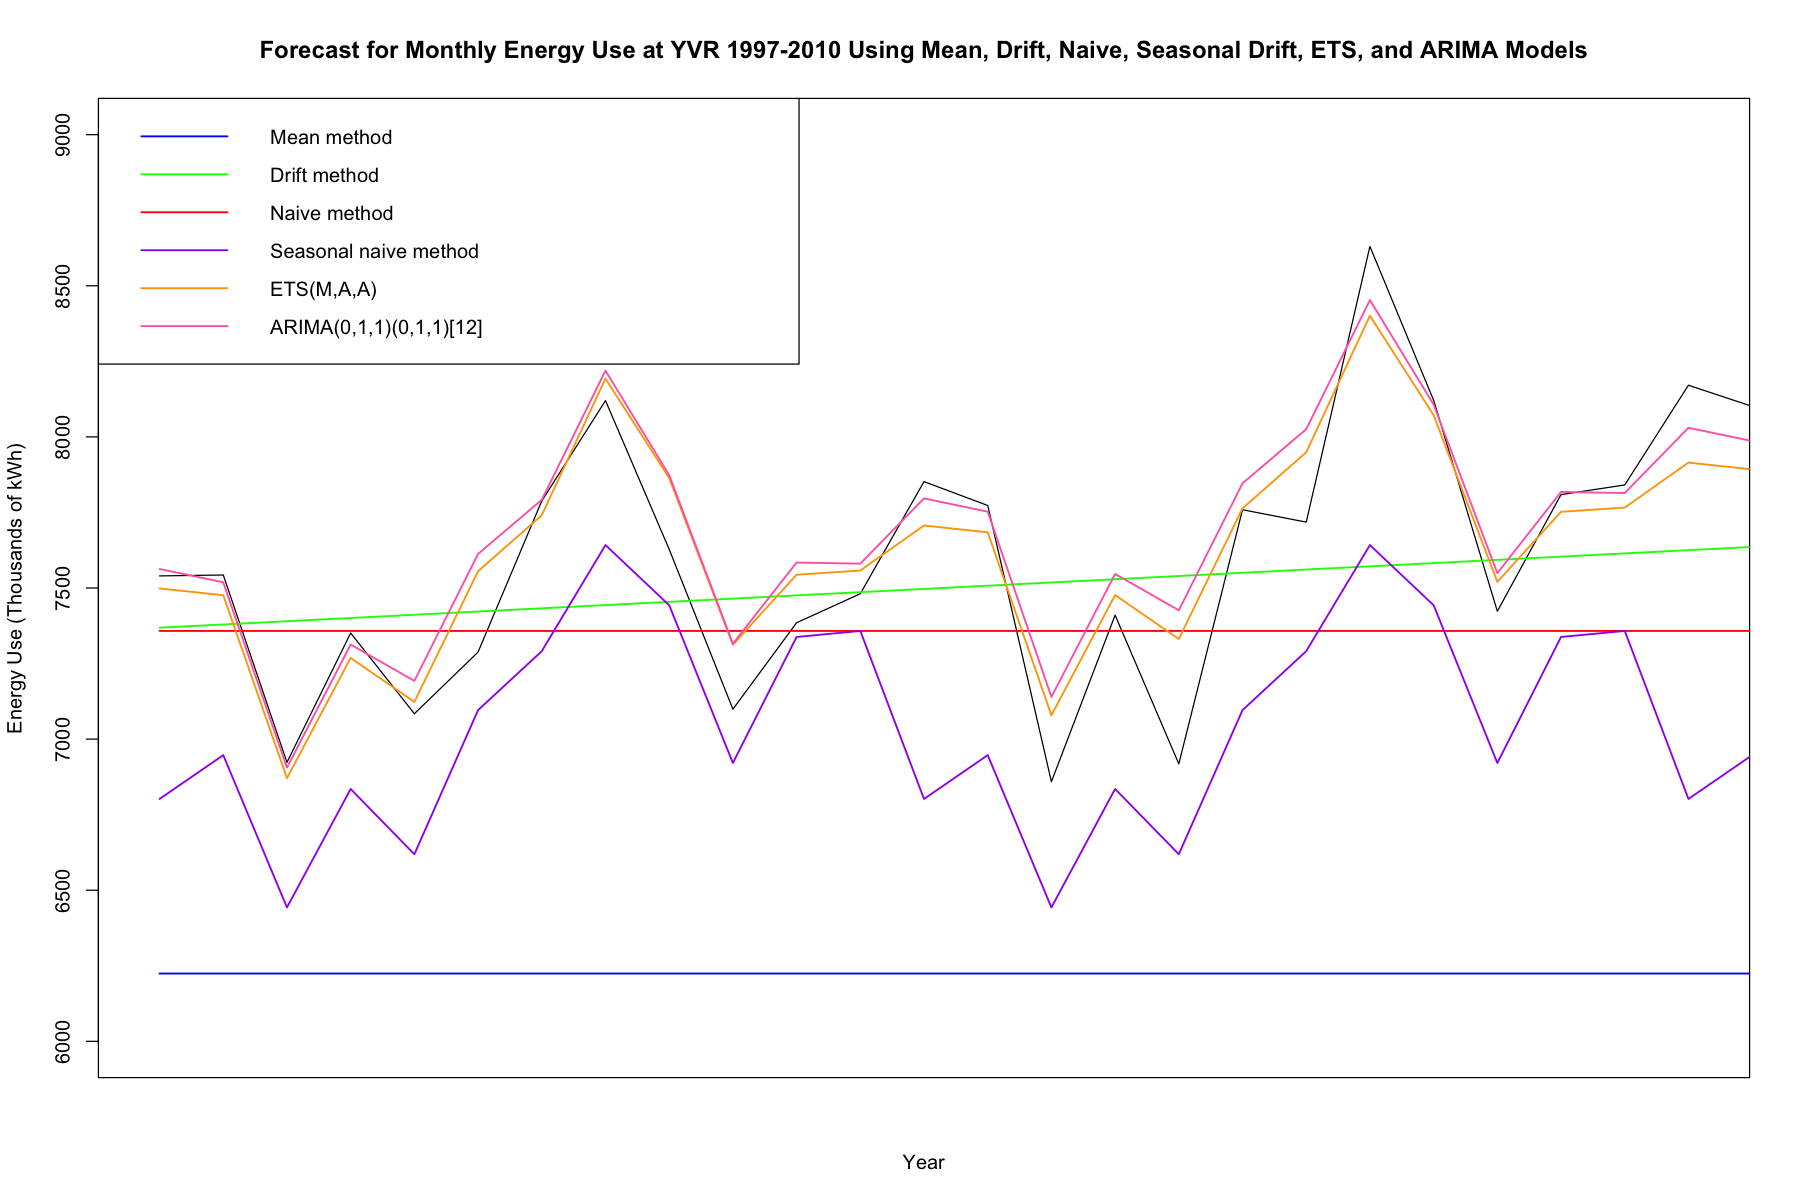

In [763]:
plot(energyts.test, main="Forecast for Monthly Energy Use at YVR 1997-2010 Using Mean, Drift, Naive, Seasonal Drift, ETS, and ARIMA Models", ylab = "Energy Use (Thousands of kWh)", xlab = "Year", xlim=c(2008, 2010), xaxt="n", ylim=c(6000,9000))
lines(energyts.mean$mean,col="blue", lwd=1.5)
lines(energyts.drift$mean,col="green", lwd=1.5)
lines(energyts.naive$mean,col="red", lwd=1.5)
lines(energyts.snaive$mean,col="purple", lwd=1.5)
lines(forecast(energyts.finalets, 36)$mean,col="orange", lwd=1.5)
lines(forecast(energyts.arimafinal, 36)$mean,col="hot pink", lwd=1.5)
legend("topleft",lty=1,lwd = 1.5, col=c("blue", "green", "red", "purple", "orange", "hot pink"), 
       legend=c("Mean method","Drift method", "Naive method", "Seasonal naive method", "ETS(M,A,A)", "ARIMA(0,1,1)(0,1,1)[12]"))

#### According to accuracy measures of the test set and forecasting on the test set, ETS(M,A,A) is the best model for forecasting the monthly energy use at YVR. The accuracy measures for ETS(M,A,A) are: RMSE=155.9826, MAE=123.1789, MAPE=1.614, and MAE=0.4649. Out of all the models, only ETS(M,A,A) and ARIMA(0,1,1)X(0,1,1)12 have a MAE less than 1 indicating that they do a better job at forecasting than just selecting the last data point. All of ETS(M,A,A)'s accuracy measures are also the lowest amongst all models, indicating that it does the best job of forecasting values while minimizing errors. This can also be seen in the forecast of test set plot shown above where the ETS(M,A,A) model captures the trend and seasonality of the data while also capturing the test data points. Even though ARIMA(0,1,1)X(0,1,1)12 does a good job at that as well, we can see through the test accuracy measures that ETS(M,A,A) performs better in all aspects. The other methods are unable to capture all 3 features at once. Overall, since ETS(M,A,A) captures all the features, has low test accuracy measures, satisfies residual properties, it indicates that it’s the best model.

<div class="alert alert-block alert-info"> 
<a id="Forecasts"></a>   
    
# Forecasts (1.25 marks)

Calculate the point forecasts using your final model for the next three years (January 2011 through December 2013).

Plot the entire dataset with the forecasts from your best forecasting method, including prediction intervals.
</div>

In [764]:
energyts.finalets.forecast <- forecast(ets(energyts, model=energyts.finalets, use.initial.values=TRUE), h=36)
energyts.finalets.forecast

         Point Forecast    Lo 80     Hi 80    Lo 95     Hi 95
Jan 2011       8116.238 7883.377  8349.099 7760.108  8472.368
Feb 2011       8093.549 7794.603  8392.494 7636.351  8550.746
Mar 2011       7488.264 7146.395  7830.132 6965.420  8011.107
Apr 2011       7886.087 7496.056  8276.118 7289.586  8482.587
May 2011       7740.442 7311.752  8169.131 7084.818  8396.065
Jun 2011       8172.849 7701.938  8643.760 7452.653  8893.046
Jul 2011       8358.490 7848.270  8868.709 7578.176  9138.803
Aug 2011       8810.453 8258.707  9362.199 7966.630  9654.276
Sep 2011       8481.218 7896.711  9065.724 7587.292  9375.143
Oct 2011       7929.615 7318.822  8540.407 6995.488  8863.741
Nov 2011       8161.482 7521.044  8801.920 7182.016  9140.948
Dec 2011       8175.306 7507.176  8843.436 7153.489  9197.122
Jan 2012       8324.379 7628.228  9020.529 7259.709  9389.049
Feb 2012       8301.689 7579.296  9024.083 7196.884  9406.495
Mar 2012       7696.404 6953.951  8438.857 6560.921  8831.887
Apr 2012

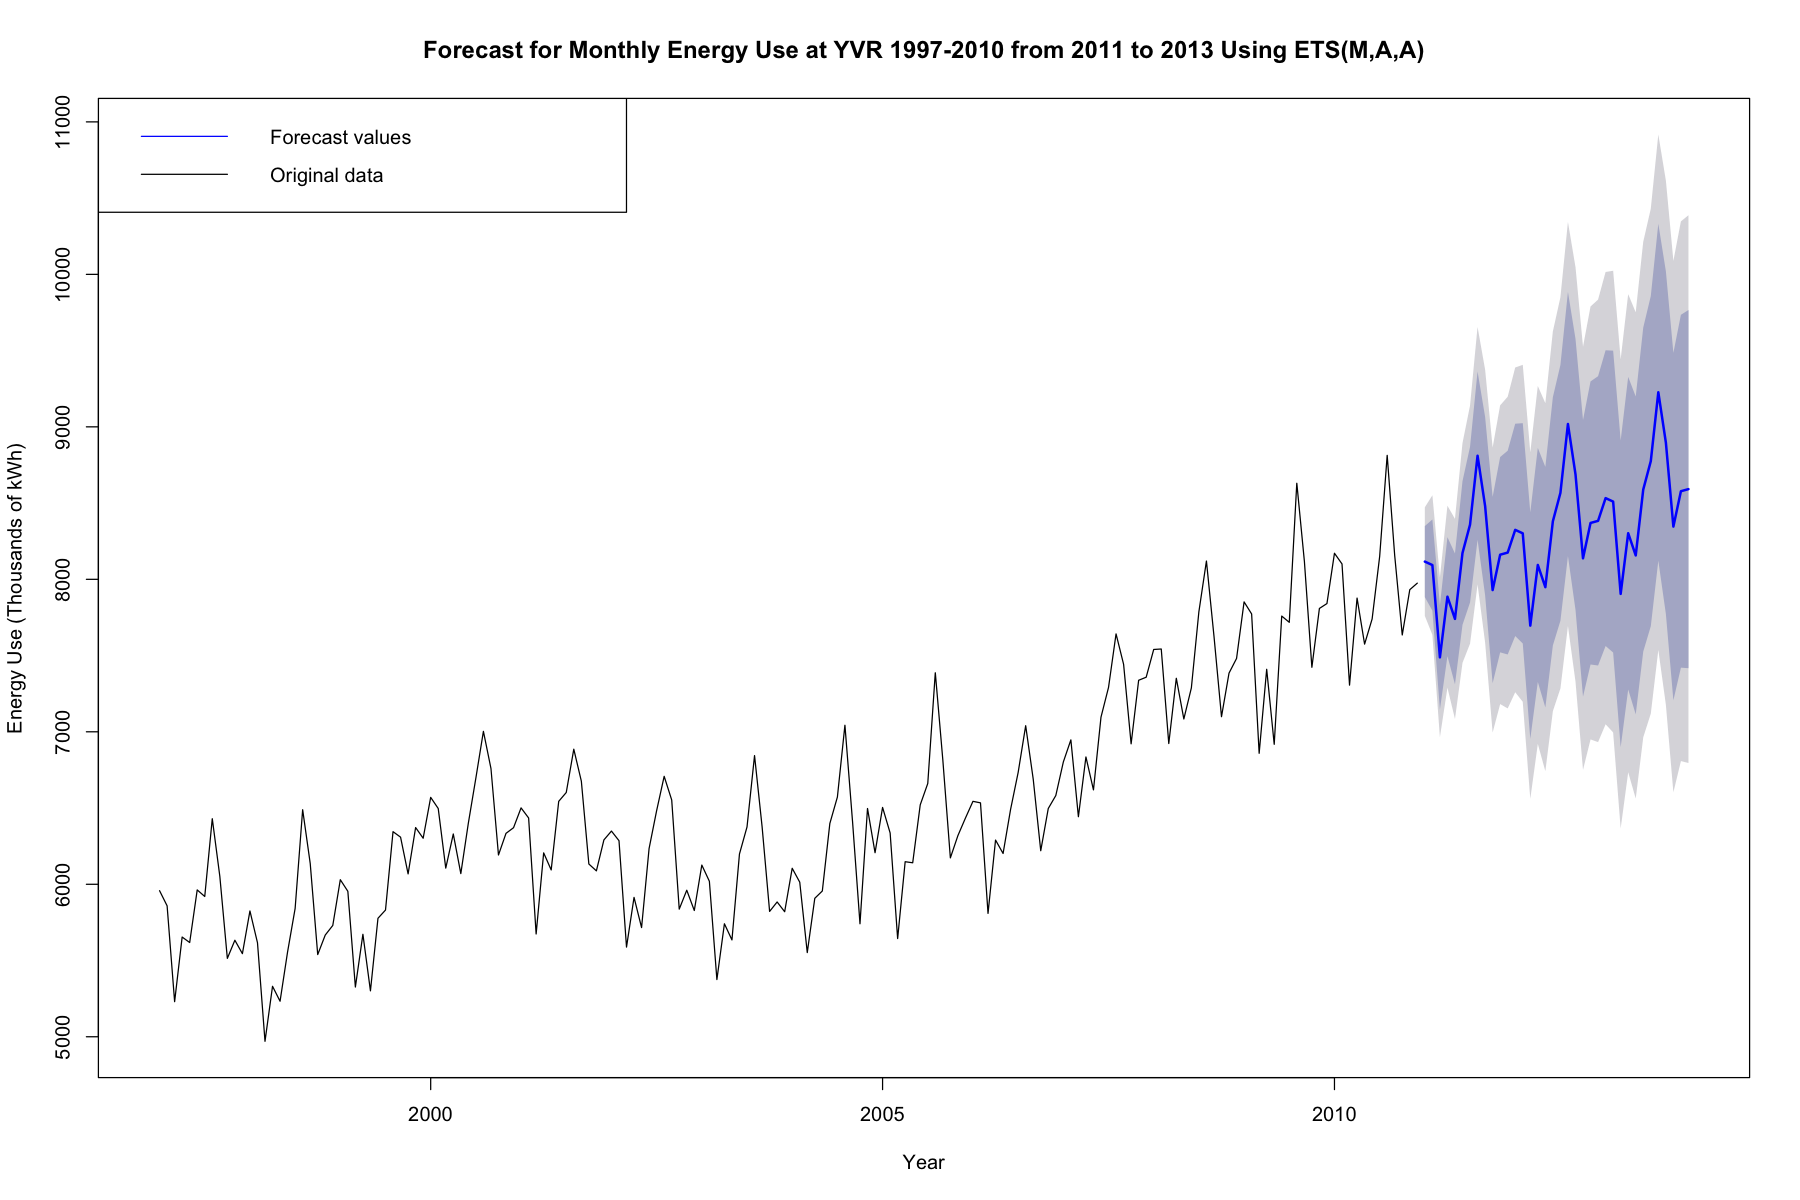

In [765]:
plot(energyts.finalets.forecast, main="Forecast for Monthly Energy Use at YVR 1997-2010 from 2011 to 2013 Using ETS(M,A,A)", ylab="Energy Use (Thousands of kWh)", xlab="Year", fcol = 'blue')
legend("topleft",lty=1, col=c("blue", "black"), 
       legend=c("Forecast values", "Original data"))

<div class="alert alert-block alert-warning">
<a id="Discussion"></a>

# Discussion (300 words max.) (3 marks)

Discuss three limitations of this final model, and recommendations to address these limitations. (300 words max.)
<div>


#### The limitations are:
#### Univariate: ETS models can only capture 1 time series variable. Realistically, as seen in the data frame of the Monthly Energy Use at YVR, we see that there are several variables, and these other variables may be influencing the energy use. Without looking at these variables and just plotting energy use over time may be inaccurate as these external variables (such as number of passengers) play a big role in energy use as well.
#### Assumptions: If the set of assumptions on which we have based our model changes, the model will be unable to produce accurate forecasts. We assume that the trend will continue following a similar pattern and that the seasonality will remain similar over time as well, but external factors can change this. For example, after COVID, the number of passengers wanting to fly reduced. Travel was also banned. Since the ETS model does not consider these changes in assumptions, it would forecast a very high energy use at YVR even when the airport was shut. Although this is an extreme example, any external factors changing the base assumption about travel will produce similar results. 
#### Outliers: As seen in the residuals plot of the STL decomposition of the Monthly Energy Use at YVR, there are outliers in the data in 1997 and 2010. The ETS model incorporates these outliers in its forecast so if Olympics, for example, causes a rush of incoming fliers into YVR suddenly, the ETS model will produce inaccurate forecasts into the future assuming that that rush is normal. 
#### To address these, we can use different multivariate models to capture external factors, check and update our model based on changing assumptions by performing transformations, and capture outliers by removing them from the time series or using models that do a better job at this.


<div class="alert alert-block alert-success">
<a id="Explanatory"></a>

# Explanatory model (200 words max.) (2 marks)

Describe a possible explanatory model to try (you do not have to create this model). Explain the process required to be able to use this model to forecast.  
</div>

#### We can use decision trees to predict the future energy usage. These models are highly interpretable and easy to use. They also take into consideration all variables and so they can get over the univariate limitation of an ETS model. Since decision trees are supervised learning models, we will proceed with a similar training and test split to check accuracy measures, which can then be compared with ETS and ARIMA models. These models are also able to tell us the importance of each variable and rank them in order. One disadvantage of decision trees, however, can be that they are too simplistic to predict complex relations and can introduce a bias towards predictors. We can bag or boost the trees or use a random forest model to reduce that bias and make our model more robust. Through cross-validation we can check which method best improves our decision tree model. The drawback is that to forecast monthly energy use, we will need to know the values of the predictors and we might have to use ETS and ARIMA model for each predictor to first forecast the values for each predictor and then forecast energy usage.

----

<div class="alert alert-block alert-danger">
<a id="AppendixA"></a>

# Appendix A:
# ETS models (1 mark)
</div>

In [766]:
energyts.ets1 <- ets(energyts.training)
summary(energyts.ets1)

ETS(A,N,A) 

Call:
 ets(y = energyts.training) 

  Smoothing parameters:
    alpha = 0.8142 
    gamma = 1e-04 

  Initial states:
    l = 6028.2465 
    s = -53.9951 -35.1353 -238.2527 322.9962 671.4127 226.3734
           66.8415 -359.4489 -191.2235 -589.7391 56.3954 123.7755

  sigma:  133.9544

     AIC     AICc      BIC 
1952.670 1956.808 1995.912 

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE       ACF1
Training set 12.73609 126.6517 98.09986 0.1709555 1.569775 0.3702114 -0.0144411

In [767]:
energyts.ets2 <- ets(energyts.training, model="MAA")
summary(energyts.ets2)

ETS(M,A,A) 

Call:
 ets(y = energyts.training, model = "MAA") 

  Smoothing parameters:
    alpha = 0.8082 
    beta  = 1e-04 
    gamma = 1e-04 

  Initial states:
    l = 5803.689 
    b = 17.436 
    s = -37.9185 -34.4259 -248.9098 320.0811 666.5463 231.972
           63.7197 -351.3296 -188.4109 -568.7838 53.8096 93.6498

  sigma:  0.0218

     AIC     AICc      BIC 
1957.628 1962.996 2006.636 

Training set error measures:
                    ME     RMSE     MAE        MPE     MAPE      MASE
Training set -6.611667 126.3696 99.4423 -0.1458104 1.602955 0.3752775
                    ACF1
Training set -0.02754951

In [768]:
energyts.ets3 <- ets(energyts.training, model="AAA")
summary(energyts.ets3)

ETS(A,A,A) 

Call:
 ets(y = energyts.training, model = "AAA") 

  Smoothing parameters:
    alpha = 0.7846 
    beta  = 1e-04 
    gamma = 1e-04 

  Initial states:
    l = 5879.3546 
    b = 12.3652 
    s = -36.7977 -27.2016 -238.1219 321.0426 666.3048 232.4424
           58.5104 -349.8579 -192.2142 -564.3842 38.3341 91.9432

  sigma:  134.6878

     AIC     AICc      BIC 
1955.855 1961.224 2004.863 

Training set error measures:
                    ME     RMSE      MAE         MPE     MAPE      MASE
Training set -1.171192 126.2613 98.95847 -0.06213835 1.594299 0.3734517
                    ACF1
Training set 0.005411505

In [769]:
energyts.ets4 <- ets(energyts.training, model="MAM")
summary(energyts.ets4)

ETS(M,Ad,M) 

Call:
 ets(y = energyts.training, model = "MAM") 

  Smoothing parameters:
    alpha = 0.8218 
    beta  = 0.0056 
    gamma = 1e-04 
    phi   = 0.9686 

  Initial states:
    l = 5803.1338 
    b = 14.0581 
    s = 0.9895 0.994 0.9604 1.0508 1.1055 1.0357
           1.0108 0.9457 0.9681 0.9069 1.009 1.0237

  sigma:  0.022

     AIC     AICc      BIC 
1959.907 1965.961 2011.798 

Training set error measures:
                   ME     RMSE     MAE       MPE     MAPE      MASE        ACF1
Training set 10.29055 127.1282 98.4941 0.1284367 1.574793 0.3716992 -0.01700129

In [770]:
energyts.hwm1 <- hw(energyts.training, h=36, seasonal="multiplicative")
summary(energyts.hwm1)


Forecast method: Holt-Winters' multiplicative method

Model Information:
Holt-Winters' multiplicative method 

Call:
 hw(y = energyts.training, h = 36, seasonal = "multiplicative") 

  Smoothing parameters:
    alpha = 0.4706 
    beta  = 1e-04 
    gamma = 0.0072 

  Initial states:
    l = 5875.9098 
    b = 8.9647 
    s = 0.9826 0.9884 0.9611 1.0515 1.1023 1.0388
           1.0155 0.9525 0.9714 0.9096 1.0082 1.0182

  sigma:  0.0237

     AIC     AICc      BIC 
1978.826 1984.195 2027.834 

Error measures:
                   ME     RMSE      MAE        MPE     MAPE      MASE      ACF1
Training set 5.731122 136.4113 105.8658 0.02292035 1.702491 0.3995188 0.3457665

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2008       7517.507 7289.219 7745.795 7168.371 7866.643
Feb 2008       7450.360 7200.345 7700.374 7067.995 7832.724
Mar 2008       6729.247 6483.871 6974.624 6353.977 7104.518
Apr 2008       7196.257 6914.518 7477.997 6765.374 7627.140
May 2008    

In [771]:
method <- c("Auto ETS","MAA", "AAA", "MAM", "HWM")
print("Accuracy measures of ETS Models on Test Set")
cbind(method, rbind(round(accuracy(forecast(energyts.ets1, 36), energyts.test), 4)[2,c(2,3,5,6)],
      round(accuracy(forecast(energyts.ets2, 36), energyts.test), 4)[2,c(2,3,5,6)],
      round(accuracy(forecast(energyts.ets3, 36), energyts.test), 4)[2,c(2,3,5,6)],
      round(accuracy(forecast(energyts.ets4, 36), energyts.test), 4)[2,c(2,3,5,6)],
      round(accuracy(forecast(energyts.hwm1, 36), energyts.test), 4)[2,c(2,3,5,6)]))

[1] "Accuracy measures of ETS Models on Test Set"


method   RMSE     MAE      MAPE   MASE  
[1,] Auto ETS 386.4068 315.9373 4.0093 1.1923
[2,] MAA      155.9826 123.1789 1.614  0.4649
[3,] AAA      188.9986 155.896  2.0037 0.5883
[4,] MAM      294.0648 245.7859 3.1472 0.9276
[5,] HWM      243.6093 203.8937 2.6199 0.7695

In [772]:
method <- c("Auto ETS","MAA", "AAA", "MAM", "HWM")
print("Accuracy measures of ETS Models on Training Set")
cbind(method, rbind(round(accuracy(forecast(energyts.ets1, 36), energyts.test), 4)[1,c(2,3,5,6)],
      round(accuracy(forecast(energyts.ets2, 36), energyts.test), 4)[1,c(2,3,5,6)],
      round(accuracy(forecast(energyts.ets3, 36), energyts.test), 4)[1,c(2,3,5,6)],
      round(accuracy(forecast(energyts.ets4, 36), energyts.test), 4)[1,c(2,3,5,6)],
      round(accuracy(forecast(energyts.hwm1, 36), energyts.test), 4)[1,c(2,3,5,6)]))

[1] "Accuracy measures of ETS Models on Training Set"


method   RMSE     MAE      MAPE   MASE  
[1,] Auto ETS 126.6517 98.0999  1.5698 0.3702
[2,] MAA      126.3696 99.4423  1.603  0.3753
[3,] AAA      126.2613 98.9585  1.5943 0.3735
[4,] MAM      127.1282 98.4941  1.5748 0.3717
[5,] HWM      136.4113 105.8658 1.7025 0.3995

<div class="alert alert-block alert-danger">
<a id="AppendixB"></a>

# Appendix B:
# ARIMA Models (1 mark)
</div>

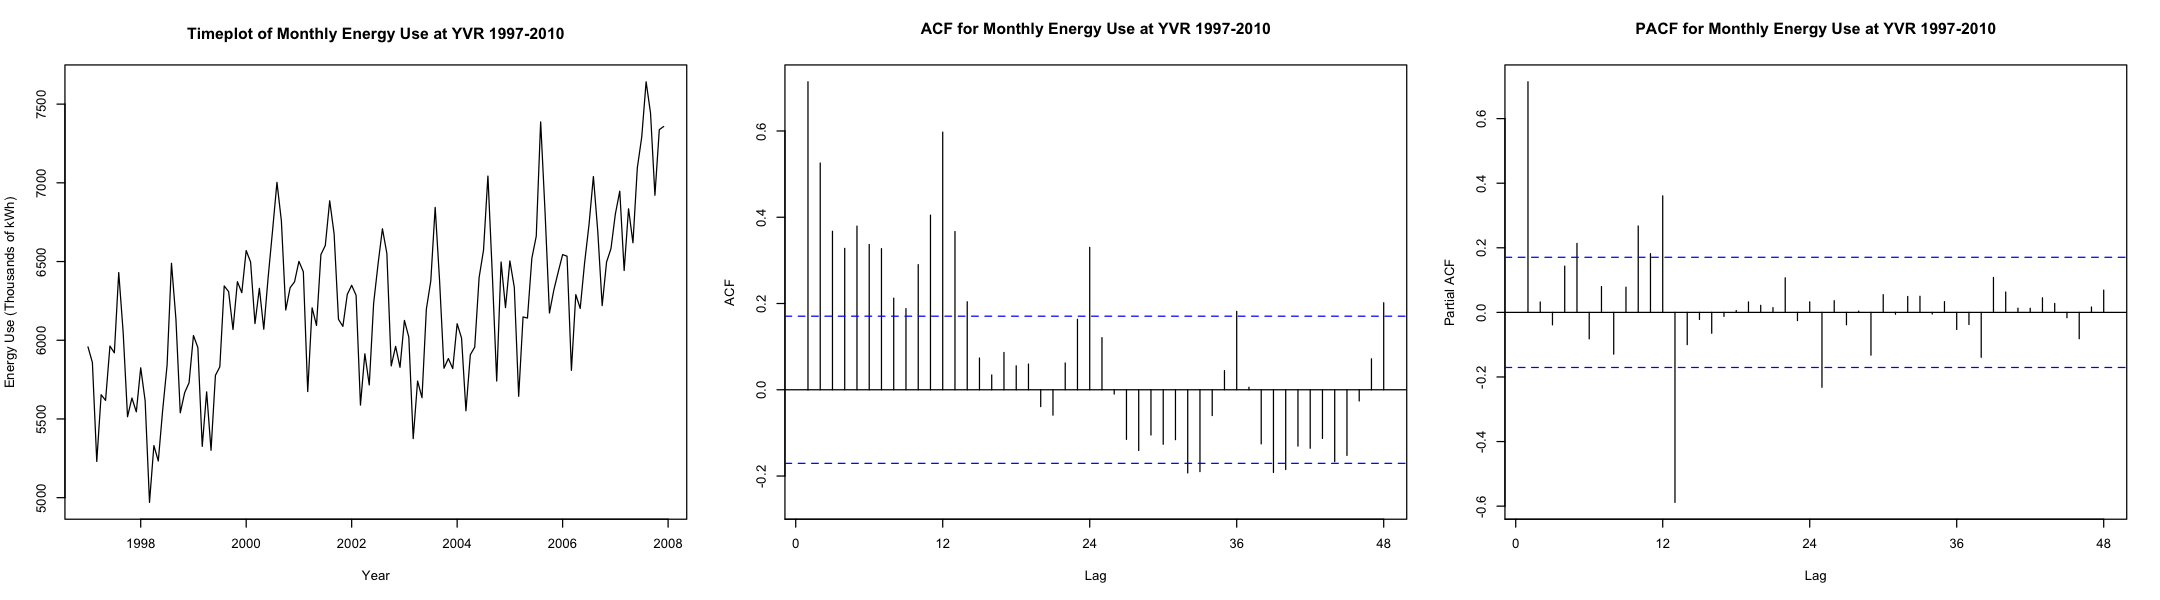

In [773]:
options(repr.plot.width=18, repr.plot.height=5)
par(mfrow=c(1,3))

plot(energyts.training, xlab = "Year", ylab = "Energy Use (Thousands of kWh)", main = "Timeplot of Monthly Energy Use at YVR 1997-2010"); abline(0,0, lty=2)
Acf(energyts.training, lag =48, main = "ACF for Monthly Energy Use at YVR 1997-2010")
Pacf(energyts.training, lag =48, main = "PACF for Monthly Energy Use at YVR 1997-2010")

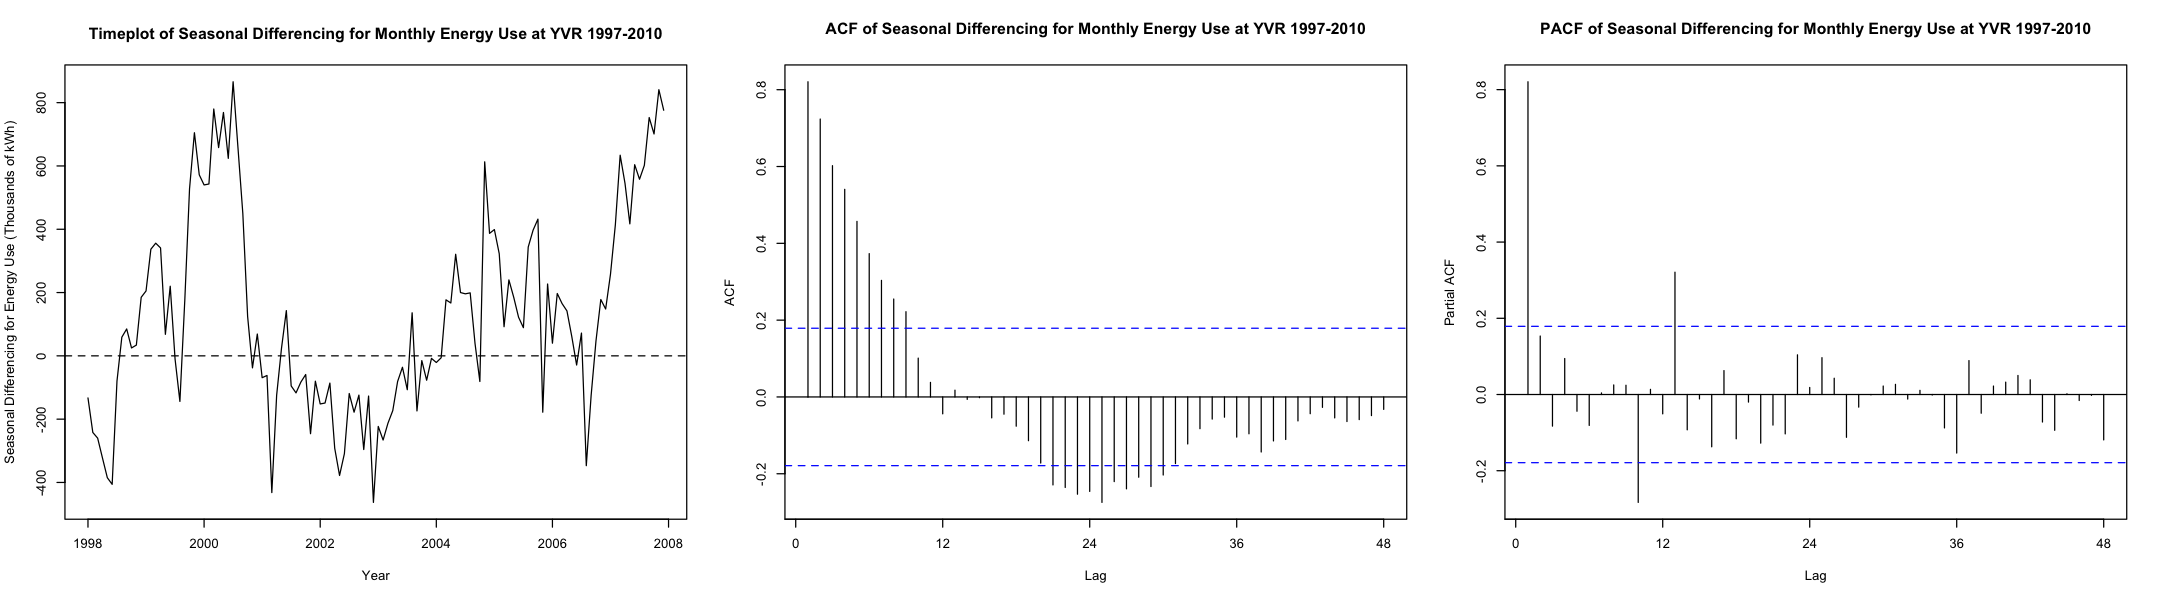

In [774]:
options(repr.plot.width=18, repr.plot.height=5)
par(mfrow=c(1,3))

plot(diff(energyts.training, lag=12), xlab = "Year", ylab = "Seasonal Differencing for Energy Use (Thousands of kWh)", main = "Timeplot of Seasonal Differencing for Monthly Energy Use at YVR 1997-2010"); abline(0,0, lty=2)
Acf(diff(energyts.training, lag=12), lag =48, main = "ACF of Seasonal Differencing for Monthly Energy Use at YVR 1997-2010")
Pacf(diff(energyts.training, lag=12), lag =48, main = "PACF of Seasonal Differencing for Monthly Energy Use at YVR 1997-2010")

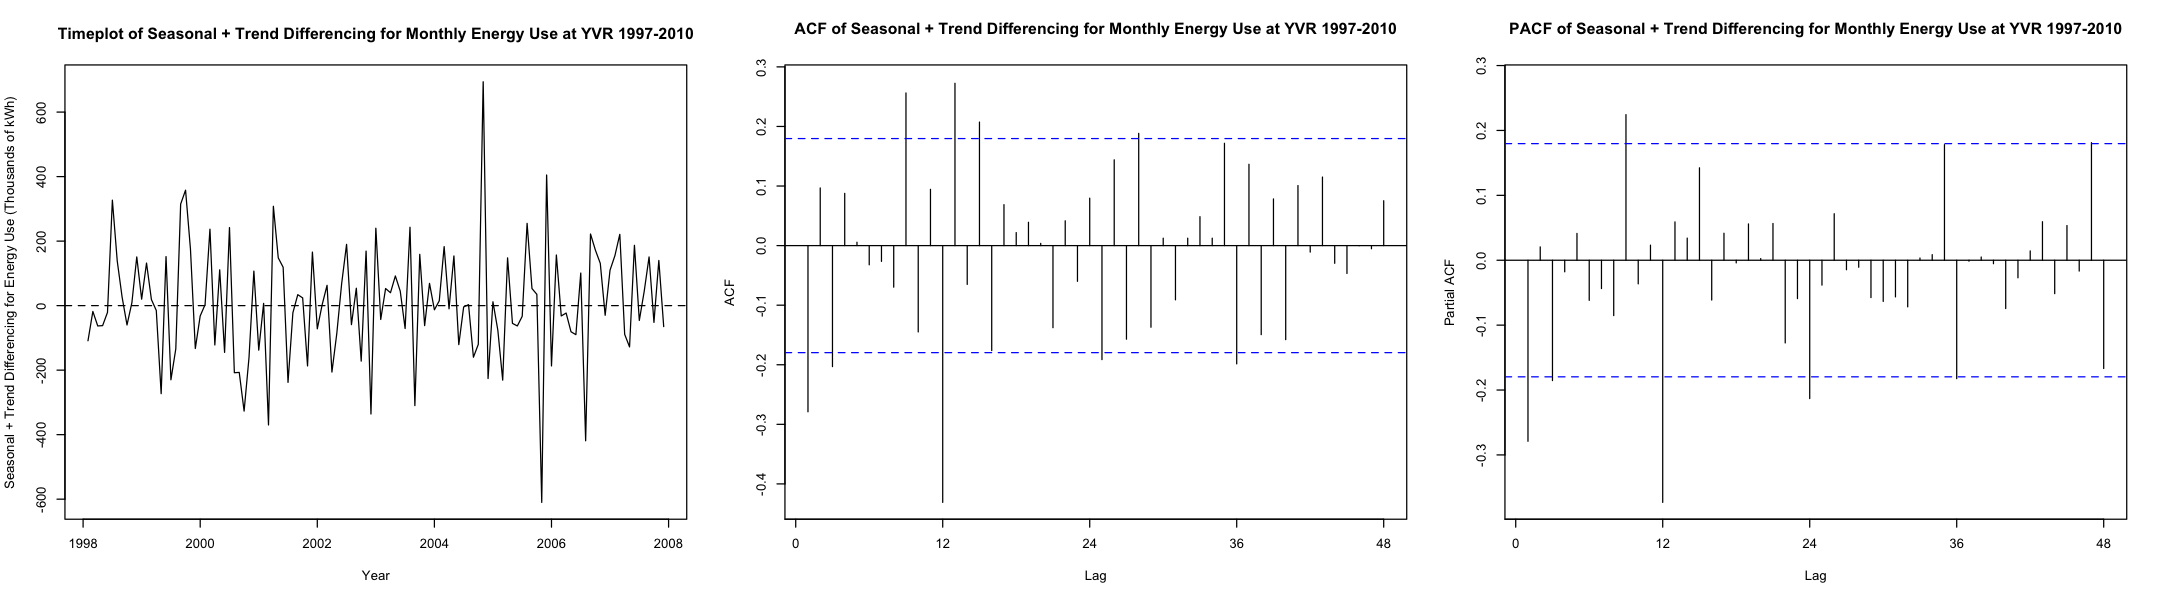

In [775]:
options(repr.plot.width=18, repr.plot.height=5)
par(mfrow=c(1,3))

plot(diff(diff(energyts.training, lag=12)), xlab = "Year", ylab = "Seasonal + Trend Differencing for Energy Use (Thousands of kWh)", main = "Timeplot of Seasonal + Trend Differencing for Monthly Energy Use at YVR 1997-2010"); abline(0,0, lty=2)
Acf(diff(diff(energyts.training, lag=12)), lag=48, main = "ACF of Seasonal + Trend Differencing for Monthly Energy Use at YVR 1997-2010")
Pacf(diff(diff(energyts.training, lag=12)), lag=48, main = "PACF of Seasonal + Trend Differencing for Monthly Energy Use at YVR 1997-2010")

#### NOTE: We will be using CSS method within the ARIMA function parameters since the optimal method in unable to accurately predict all smoothing parameters for the ARIMA(1,1,0)X(3,1,0)12 but CSS method can. Also, for auto arima, CSS method produced better results as seen in the accuracy measures test below so we went ahead with the auto arima CSS method as our main model. This discrepency is due to the different steps both methods follow in coming up with a model, giving importance to reducing different model goodness-of-fit factors. 

In [776]:
energyts.arima1 <- Arima(energyts.training, order=c(1, 1, 0), seasonal=c(3, 1, 0), method = "CSS")
summary(energyts.arima1)

Series: energyts.training 
ARIMA(1,1,0)(3,1,0)[12] 

Coefficients:
          ar1     sar1     sar2     sar3
      -0.3179  -0.5124  -0.3746  -0.3321
s.e.   0.0909   0.0879   0.0935   0.0906

sigma^2 = 15169:  log likelihood = -761.78

Training set error measures:
                   ME    RMSE      MAE       MPE     MAPE      MASE        ACF1
Training set 8.081502 114.957 67.20138 0.1037929 1.053889 0.2536061 -0.01863506

In [777]:
energyts.arima2 <- auto.arima(energyts.training)
summary(energyts.arima2)

Series: energyts.training 
ARIMA(1,1,0)(2,1,0)[12] 

Coefficients:
          ar1     sar1     sar2
      -0.2482  -0.4993  -0.2136
s.e.   0.0909   0.0937   0.1006

sigma^2 = 24330:  log likelihood = -769.95
AIC=1547.9   AICc=1548.25   BIC=1559.01

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 9.902709 146.2229 104.9458 0.1326502 1.668495 0.3960468
                    ACF1
Training set -0.00807819

In [778]:
energyts.arima3 <- auto.arima(energyts.training, method="CSS")
summary(energyts.arima3)

Series: energyts.training 
ARIMA(0,1,1)(0,1,1)[12] 

Coefficients:
          ma1     sma1
      -0.1992  -0.8106
s.e.   0.0906   0.0656

sigma^2 = 21514:  log likelihood = -761.44

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 17.15982 138.0902 99.44907 0.2387605 1.582683 0.3753031
                    ACF1
Training set -0.01576781

In [779]:
method <- c("ARIMA(1,1,0)X(3,1,0)[12]","Auto Arima with Optimal Method", "Auto Arima with CSS method")
print("Accuracy measures of ARIMA Models on Test Set")
cbind(method, rbind(round(accuracy(forecast(energyts.arima1, 36), energyts.test), 4)[2,c(2,3,5,6)],
                    round(accuracy(forecast(energyts.arima2, 36), energyts.test), 4)[2,c(2,3,5,6)],
                    round(accuracy(forecast(energyts.arima3, 36), energyts.test), 4)[2,c(2,3,5,6)]))

[1] "Accuracy measures of ARIMA Models on Test Set"


method                         RMSE     MAE      MAPE   MASE  
[1,] ARIMA(1,1,0)X(3,1,0)[12]       538.6753 491.6754 6.4175 1.8555
[2,] Auto Arima with Optimal Method 532.0309 459.5773 5.9856 1.7344
[3,] Auto Arima with CSS method     172.4477 132.1323 1.7479 0.4986

In [780]:
method <- c("ARIMA(1,1,0)X(3,1,0)[12]","Auto Arima with Optimal Method", "Auto Arima with CSS method")
print("Accuracy measures of ARIMA Models on Training Set")
cbind(method, rbind(round(accuracy(forecast(energyts.arima1, 36), energyts.test), 4)[1,c(2,3,5,6)],
                    round(accuracy(forecast(energyts.arima2, 36), energyts.test), 4)[1,c(2,3,5,6)],
                    round(accuracy(forecast(energyts.arima3, 36), energyts.test), 4)[1,c(2,3,5,6)]))

[1] "Accuracy measures of ARIMA Models on Training Set"


method                         RMSE     MAE      MAPE   MASE  
[1,] ARIMA(1,1,0)X(3,1,0)[12]       114.957  67.2014  1.0539 0.2536
[2,] Auto Arima with Optimal Method 146.2229 104.9458 1.6685 0.396 
[3,] Auto Arima with CSS method     138.0902 99.4491  1.5827 0.3753